<a href="https://colab.research.google.com/github/SeptiWindi/Startup-Fail-Analysis-Unveiling-the-Patterns-Behind-Startup-Failure/blob/main/startup_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Startup Fail Analysis: Unveiling the Patterns Behind Startup Failure**

**Problem Statement**

Startup is a business that has just been established and grown supported by digital services and has also become an important element of innovation systems and economies around the world. The Startup ecosystem is growing very rapidly and still needs a lot of funding to operate with a minimalist working group. So it is very

important for investor to monitor the performance and performance of Startup, so that it can be used as a consideration to decide whether to fund a Startup to drive its growth or refuse to take part in funding. To monitor startup performance, it is important to analyze what makes a Startup successful and how to determine its success.

**Goals**

The goal to be achieved is to determine whether a StartUp will be successful or not.



**Objective**

The objective is to analyze startup behavior based on several variables, determine what variables affect startup success the most, then build a model that can predict the success of a StartUp.

# Setup Packages

In [ ]:
%pip install scipy==1.11.4
%pip install dalex
%pip install scikit-plot
%pip install shap
%pip install lime
%pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=3fb84485e27abe936e526938746787c2571a7a41a558e378f966514c3d76ad51
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import folium
from folium.plugins import MarkerCluster

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc, precision_recall_curve, f1_score
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
import dalex as dx
import scikitplot as skplt

import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

## Load Dataset

In [ ]:
df = pd.read_csv('/content/startup data.csv')
df.head()

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  \
0      San Diego                     NaN        Bandsintown       1   
1      Los Gatos                     NaN          TriCipher       1   
2      San Diego      San Diego CA 92121              Plixi       1   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0   

  founded_at closed_at first_funding_at last_funding_at  \
0     1/1/07       NaN           4/1/09          1/1/10   
1     1/1/00       NaN          2/14/05        12/28/09   
2    3/18/09       NaN          3/30/10         3/30/10   
3     1/1/02       NaN          2/17/05         4/25/07   
4     8/1/10   10/1/12           8/1/10          4/1/12   

   age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  2.2493                 3.0027                    4.6685   
1                  5.1260                 9.9973                    7.0055   
2                  1.0329                 1.0329                    1.4575   
3                  3.1315                 5.3151                    6.0027   
4                  0.0000                 1.6685                    0.0384   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                   6.7041              3               3             375000   
1                   7.0055              9               4           40100000   
2                   2.2055              5               1            2600000   
3                   6.0027              5               3           40000000   
4                   0.0384              2               2            1300000   

   milestones state_code.1  is_CA  is_NY  is_MA  is_TX  is_otherstate  \
0           3           CA      1      0      0      0              0   
1           1           CA      1      0      0      0              0   
2           2           CA      1      0      0      0              0   
3           1           CA      1      0      0      0              0   
4           1           CA      1      0      0      0              0   

  category_code  is_software  is_web  is_mobile  is_enterprise  \
0         music            0       0          0              0   
1    enterprise            0       0          0              1   
2           web            0       1          0              0   
3      software            1       0          0              0   
4   games_video            0       0          0              0   

   is_advertising  is_gamesvideo  is_ecommerce  is_biotech  is_consulting  \
0               0              0             0           0              0   
1               0              0             0           0              0   
2               0              0             0           0              0   
3               0              0             0           0              0   
4               0              1             0           0              0   

   is_othercategory object_id  has_VC  has_angel  has_roundA  has_roundB  \
0                 1    c:6669       0          1           0           0   
1                 0   c:16283       1          0           0           1   
2                 0   c:65620       0          0           1           0   
3                 0   c:42668       0          0           0           1   
4                 0   c:65806       1          1           0           0   

   has_roundC  has_roundD  avg_participants  is_top500    status  
0           0           0        

In [ ]:
df.shape

(923, 49)

### Data Understanding

- 'Unnamed:0' = possibly representing the index or a placeholder for missing data.
- 'state_code' = state code
- 'latitude' = north south position
- 'longitude' = east west position
- 'zip_code' = postal code
- 'id' = unique values
- 'city'= location
- 'Unnamed: 6' = Another unnamed column, likely a placeholder for missing data or unused information.
- 'name' = startup name
- 'labels' = Maybe same as status
- 'founded_at' = date founded
- 'closed_at' = date closed
- 'first_funding_at' = date first received it's funding
- 'last_funding_at' = The date of the most recent funding round.
- 'age_first_funding_year' = the age of the startup when it received first funding
- 'age_last_funding_year' = The age of the startup in years when it received its last funding.
- 'age_first_milestone_year' = The age of the startup when it achieved its first major milestone.
- 'age_last_milestone_year' = The age of the startup when it achieved its last major milestone.
- 'relationships' = The number of professional relationships or connections the startup has established.
- 'funding_rounds' = The total number of funding rounds the startup has gone through.
- 'funding_total_usd' = The total amount of funding the startup has raised
- 'milestones' = The total number of significant milestones the startup has achieved
- 'state_code.1' = secondary state code, potentially for validation or categorization purposes.
- 'is_CA', 'is_NY', is_MA', 'is_TX' = is it located in california, new york, massachusets or texas.
- 'is_otherstate' = is it located not in one of 4 locations above
- 'category_code' = The industry or category to which the startup belongs
- 'is_software' = in software industry
- 'is_web' = web industry
- 'is_mobile' = mobile industry
- 'is_enterprise' = enterprise industry
- 'is_advertising' = advertising industry
- 'is_gamesvideo' = games or video industry
- 'is_ecommerce' = e-commerce industry
- 'is_biotech' = biotech industry
- 'is_consulting' = consulting industry
- 'is_othercategory' = other than anything above
- 'object_id' =  A unique identifier for each object
- 'has_VC' = the startup has venture capital funding
- 'has_angel' = the startup has received angel funding
- 'has_roundA' = whether the startup has gone through a Series A funding round
- 'has_roundB' = whether the startup has gone through a Series B funding round
- 'has_roundC' = whether the startup has gone through a Series C funding round
- 'has_roundD' = whether the startup has gone through a Series D funding round
- 'avg_participants' = The average number of participants involved in the startup's funding rounds.
- 'is_top500' = is in the top 500 startups?
- 'status' = acquired or closed.

In [ ]:
# Checking unique values
attFeatures = []
for i in df.columns:
    attFeatures.append([i,df[i].dtype, df[i].nunique(), df[i].sort_values().drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features','Type', 'Unique Number', 'Values'])

Features     Type  Unique Number  \
0                 Unnamed: 0    int64            923   
1                 state_code   object             35   
2                   latitude  float64            652   
3                  longitude  float64            651   
4                   zip_code   object            382   
5                         id   object            922   
6                       city   object            221   
7                 Unnamed: 6   object            252   
8                       name   object            922   
9                     labels    int64              2   
10                founded_at   object            255   
11                 closed_at   object            223   
12          first_funding_at   object            635   
13           last_funding_at   object            733   
14    age_first_funding_year  float64            634   
15     age_last_funding_year  float64            756   
16  age_first_milestone_year  float64            471   
17   age_last_milestone_year  float64            585   
18             relationships    int64             41   
19            funding_rounds    int64              9   
20         funding_total_usd    int64            505   
21                milestones    int64              8   
22              state_code.1   object             35   
23                     is_CA    int64              2   
24                     is_NY    int64              2   
25                     is_MA    int64              2   
26                     is_TX    int64              2   
27             is_otherstate    int64              2   
28             category_code   object             35   
29               is_software    int64              2   
30                    is_web    int64              2   
31                 is_mobile    int64              2   
32             is_enterprise    int64              2   
33            is_advertising    int64              2   
34             is_gamesvideo    int64              2   
35              is_ecommerce    int64              2   
36                is_biotech    int64              2   
37             is_consulting    int64              2   
38          is_othercategory    int64              2   
39                 object_id   object            922   
40                    has_VC    int64              2   
41                 has_angel    int64              2   
42                has_roundA    int64              2   
43                has_roundB    int64              2   
44                has_roundC    int64              2   
45                has_roundD    int64              2   
46          avg_participants  float64             59   
47                 is_top500    int64              2   
48                    status   object              2   

                                               Values  
0   [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...  
1   [AR, AZ, CA, CO, CT, DC, FL, GA, ID, IL, IN, K...  
2   [25.752358, 26.0524615, 26.106273, 27.951849, ...  
3   [-122.7569561, -122.725662, -122.674456, -122....  
4   [01752-4603, 01862-2000, 02111-1720, 10001, 10...  
5   [c:10054, c:101312, c:10137, c:10153, c:10158,...  
6   [Acton, Addison, Alameda, Albuquerque, Aliso V...  
7   [Acton MA 1720, Addison TX 75001, Alameda CA 9...  
8   [#waywire, 1000memories, 41st Parameter, 5min ...  
9                                              [0, 1]  
10  [1-Apr-07, 1-Aug-06, 1-Aug-08, 1-Aug-10, 1-Dec...  
11  [1-Apr-12, 1-Aug-11, 1-Aug-12, 1-Feb-10, 1-Feb...  
12  [1-Apr-07, 1-Aug-06, 1-Aug-07, 1-Aug-10, 1-Dec...  
13  [1-Apr-08, 1-Apr-13, 1-Aug-07, 1-Aug-10, 1-Dec...  
14  [-9.0466, -3.5068, -1.9863, -1.4712, -1.1836, ...  
15  [-9.0466, -1.9863, -1.1836, -0.9178, -0.5014, ...  
16  [-14.1699, -7.0055, -6.0466, -3.7507, -3.0, -2...  
17  [-7.0055, -3.8822, -3.7507, -3.0, -1.9151, -1....  
18  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
19                       [1, 2, 3, 4, 5, 6, 7, 8, 10]  
20  [11000, 12000, 15000, 19000, 20000, 211

### Objectives

Business Question
- What Happened?

According to the Bureau of Labor Statistic, **1/5 startups fail within their first year**. and **up to 65% of startups will fail within 10 years** of opening for businesses.
As a business consultant,

our client wants us to prevent his startup from going fail.
- why did it happen?

1. 38% of startup failures occur due to financial issues
2. 35% of businesses fail due to lack of market need
3. 20% of businesses fail due to industry competition
4. 19% of businesses fail due to unsuccessful business model
5. 18% of businesses fail due to legal challenges

source : https://www.forbes.com/advisor/business/software/startups-failure-rate/

- What will we do?

We're gonna eksplore fail startup dataset to make a predicition model of failing startup. Then giving insight what is the biggest cause of failing startup?

- How we do that?

We're going to use classification to consider is the startup will fail (0) or no. Then we use Feature Importance and SHAP to find the causes.

# Data Preprocessing

## Data Duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

Unnamed: 0                    int64
state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
id                           object
city                         object
Unnamed: 6                   object
name                         object
labels                        int64
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
category_code                object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise                 int64
is_advertising                int64
is_gamesvideo                 int64
is_ecommerce                  int64
is_biotech                    int64
is_consulting                 int64
is_othercategory              int64
object_id                    object
has_VC                        int64
has_angel                     int64
has_roundA                    int64
has_roundB                    int64
has_roundC                    int64
has_roundD                    int64
avg_participants            float64
is_top500                     int64
status                       object
dtype: object

In [ ]:
df['name'].duplicated().sum()

1

We've identified duplicate names among startups. Let's investigate further!



In [ ]:
duplicate_names = df[df.duplicated('name', keep=False)]
display(duplicate_names.sort_values('name'))

Unnamed: 0 state_code  latitude   longitude zip_code       id     city  \
124         506         CA  37.54827 -121.988572    94538  c:28482  Fremont   
832         505         CA  37.48151 -121.945328    94538  c:28482  Fremont   

           Unnamed: 6             name  labels founded_at closed_at  \
124  Fremont CA 94538  Redwood Systems       1     1/1/08       NaN   
832               NaN  Redwood Systems       1     1/1/08       NaN   

    first_funding_at last_funding_at  age_first_funding_year  \
124          10/3/08         5/30/12                  0.7562   
832          10/3/08         5/30/12                  0.7562   

     age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
124                 4.4137                    2.7836                   4.0027   
832                 4.4137                    2.7836                   4.0027   

     relationships  funding_rounds  funding_total_usd  milestones  \
124             14               4           34250000           2   
832             14               4           34250000           2   

    state_code.1  is_CA  is_NY  is_MA  is_TX  is_otherstate category_code  \
124           CA      1      0      0      0              0     cleantech   
832           CA      1      0      0      0              0     cleantech   

     is_software  is_web  is_mobile  is_enterprise  is_advertising  \
124            0       0          0              0               0   
832            0       0          0              0               0   

     is_gamesvideo  is_ecommerce  is_biotech  is_consulting  is_othercategory  \
124              0             0           0              0                 1   
832              0             0           0              0                 1   

    object_id  has_VC  has_angel  has_roundA  has_roundB  has_roundC  \
124   c:28482       1          0           1           1           1   
832   c:28482       1          0           1           1           1   

     has_roundD  avg_participants  is_top500    status  
124           0              2.25          1  acquired  
832           0              2.25          1  acquired

In [ ]:
#Let’s drop one of them to prevent duplication.
df = df.drop(832)

- We have to convert the datetype columns to the right type
- Map Status column to 1 and 0, change it to int

In [ ]:
df['status'] = df.status.map({'acquired':1, 'closed':0})

In [ ]:
date_cols = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Checking is label exactly the same as status
for index, row in df.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'], row['status'])

Okay it's the same, so we gonna drop it

In [ ]:
# Drop Labels column
df.drop('labels', axis=1, inplace=True)

## Data Cleaning

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  492
name                          0
founded_at                    0
closed_at                   587
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
object_id                     0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
status                        0
dtype: int64

In [ ]:
# Adjustment between 'status' and 'closed_at' data
df[(df['status'] == 1) & (df['closed_at'].notnull())]

Unnamed: 0 state_code   latitude   longitude        zip_code       id  \
73          245         CA  37.779026 -122.401840           94103    c:170   
104         811         CA  37.748676 -122.415813           94110   c:4622   
291         336         MD  39.232878  -76.820467  Maryland 21045  c:20062   
342         776         TX  30.409765  -97.751010           78759  c:44434   
381        1148         CA  37.502742 -122.211281           94063    c:975   
445         252         MA  37.090240  -95.712891            2142   c:1725   
473         814         CA  39.762314 -104.982256           94010    c:465   
560         153         CA  37.776618 -122.393893           94107   c:1541   
756         629         CA  37.398022 -122.049143           94043   c:3610   

              city       Unnamed: 6               name founded_at  closed_at  \
73   San Francisco              NaN            adBrite 2003-01-01 2001-02-01   
104  San Francisco              NaN           Aardvark 2007-07-01 2011-09-01   
291       Columbia              NaN         Heartscape 2000-01-01 2009-10-15   
342         Austin  Austin TX 78759  Movero Technology 2003-01-01 2013-06-01   
381   Redwood City              NaN            Grouply 2006-03-01 2012-01-01   
445      Cambridge              NaN       N2N Commerce 2006-01-01 2008-01-01   
473     Burlingame              NaN         Brightkite 2007-01-01 2011-12-01   
560  San Francisco              NaN             Dapper 2006-10-01 2010-11-16   
756  Mountain View              NaN  Clearwell Systems 2004-12-06 2011-05-19   

    first_funding_at last_funding_at  age_first_funding_year  \
73        2004-09-01      2012-05-01                  1.6685   
104       2007-01-01      2008-10-01                 -0.4959   
291       2007-04-24      2007-04-24                  7.3151   
342       2007-06-14      2010-03-23                  4.4521   
381       2007-06-01      2008-01-14                  1.2521   
445       2008-01-03      2008-01-03                  2.0055   
473       2007-08-01      2009-07-06                  0.5808   
560       2007-12-01      2007-12-01                  1.1671   
756       2006-04-04      2007-08-22                  1.3260   

     age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
73                  9.3370                    7.3808                  10.4740   
104                 1.2548                    2.1726                   4.6000   
291                 7.3151                    5.0055                   5.0055   
342                 7.2274                    7.0055                   7.0055   
381                 1.8740                    4.7178                   5.0959   
445                 2.0055                    0.0000                   0.0000   
473                 2.5123                    0.5918                   4.9699   
560                 1.1671                    1.9260                   4.0137   
756                 2.7096                    4.3699                   6.4630   

     relationships  funding_rounds  funding_total_usd  milestones  \
73              17               4           40400000           3   
104             21               2            6000000           2   
291              6               1           16980999           1   
342              5               2            5992316           1   
381             13               3            2600000           2   
445              1               1           30000000           1   
473              9               3            1415000           4   
560             19               1            3000000           4   
756              6               2           29000000           3   

    state_code.1  is_CA  is_NY  is_MA  is_TX  is_otherstate    category_code  \
73            CA      1      0      0      0              0      advertising   
104           CA      1      0      0      0              0              web   
291           MD      0      0      0   

Once a startup has a close_at date, its final observable status is closed, even if it was acquired earlier. So, we drop those from dataset.

In [ ]:
# Drop 'status' of acquired for closed startups
adj_status = df[(df['status'] == 1) & (df['closed_at'].notnull())]
df = df.drop(adj_status.index)

##Feature Engineering and Adjustment

### 1️⃣ get_first_funding

In [ ]:
# 1️⃣ The distance between First 'funding_at' and 'founded_at'
df['get_first_funding'] = (pd.to_datetime(df['first_funding_at']) - pd.to_datetime(df['founded_at'])).dt.days
df['get_first_funding']

0       821
1      1871
2       377
3      1143
4         0
       ... 
918     189
919    2647
920    3101
921     277
922    1139
Name: get_first_funding, Length: 913, dtype: int64

In [ ]:
# Checking on anomaly data
df[df['get_first_funding'] < 0]

Unnamed: 0 state_code   latitude   longitude zip_code        id  \
23           26         CA  37.764395 -122.401024    94103   c:10751   
32          485         NC  36.002893  -78.904075    27701   c:27741   
71          315         CA  37.349210 -122.032602    94087  c:190214   
79          555         MA  42.375100  -71.105616     2138   c:31514   
80          943         CA  37.779281 -122.419236    94105   c:58944   
122         615         TX  40.694599  -73.990638    78701    c:3505   
127         550         PA  40.441694  -79.990086    15213   c:31294   
234        1032         CA  37.465645 -121.932202    94538      c:72   
240         529         CA  37.406914 -122.090370    94043   c:30173   
263         891         UT  40.767013 -111.890431    84124   c:53831   
284          88         CA  37.448944 -122.161415    94301   c:13358   
312         526         CA  37.778613 -122.395289    94107      c:30   
340        1113         CA  37.388077 -122.083160    94041      c:86   
368         862         CA  33.685697 -117.825982    92612   c:51021   
379         377         MA  42.360253  -71.058291     2114    c:2275   
382         869         CA  37.779281 -122.419236    94103   c:51332   
397          18         NY  37.809782 -122.417306    10003     c:105   
407         104         NY  40.729839  -73.991781    10003    c:1388   
420         585         CA  32.889450 -117.166929    92121    c:3267   
431         886         CA  34.066697 -118.383367    90211   c:53304   
432         314         CT  54.983201   -1.574631     6103    c:1899   
466         482         CA  37.775206 -122.419209    94107   c:27591   
488         468         CA  37.387845 -122.055197    94089      c:27   
489         325         CA  37.550954 -122.315396    94303    c:1957   
499         600         CA  37.437328 -122.159928    94303    c:3400   
513         545         NY  40.743808  -73.983626    10010    c:3094   
518        1035         CA  37.563585 -122.324621    94043     c:726   
536          69         WA  47.603327 -122.334983    98104    c:1253   
558         372         NY  40.743662  -73.984268    10016    c:2245   
566         968         KY  38.046407  -84.497039    40507   c:60521   
567         839         CA  37.814202 -122.477959    94025    c:4881   
584        1017         MA  42.358956  -71.054776     2109    c:6964   
603         990         CA  37.779281 -122.419236    94105   c:63731   
609         499         CA  37.406302 -122.108874    94040   c:28403   
702         118         DC  38.894955  -77.036646    20005  c:144631   
720         880         TX  30.280148  -97.749908    78701   c:52406   
763         870         CA  37.779281 -122.419236    94110   c:51379   
782         826         UT  40.233844 -111.658534    84087   c:47341   
785         830         NY  40.759089  -73.987573    10036   c:47662   
788         101         CA  34.144926 -118.149767    91105   c:13815   
830         711         CA  37.779281 -122.419236    94111   c:41006   
831         488         NY  40.707645  -74.010816    10038   c:27938   
847         133         RI  41.818712  -71.411775     2903  c:148566   
851         857         CA  37.779281 -122.419236    94107   c:50449   
875         591         MA  42.375100  -71.105616     2139   c:33416   

               city               Unnamed: 6                 name founded_at  \
23    San Francisco                      NaN            Pixelpipe 2008-01-01   
32           Durham                      NaN               eMinor 2006-10-01   
71        Sunnyvale                      NaN              Behavio 2012-06-12   
79        Cambridge        Cambridge MA 2138            AccelGolf 2008-08-01   
80    San Francisco   San Francisco CA 94105                MoPub 2010-09-09   
122          Austin                      NaN         Workstreamer 2009-10-01   
127      Pittsburgh      Pittsburgh PA 15213                Bueda 2009-01-04   
234         Fremont                      NaN        

There are 46 startup that has 'funding' before it was established, some of them has more than 2 and 5 years 'funding' prior to 'founded_at', making its a serious anomaly.

To avoid confusing the prediction and classificaton model, we will remove this data (noise). Leaving it uncorrected could mislead the model, as it is logically impossible for a company to receive funding before it exists.

In [ ]:
# Drop 'get_first_funding' that has negative value
negative_first_funding = df[df['get_first_funding'] < 0].index
df.drop(negative_first_funding, inplace=True)

###2️⃣ lifespan

In [ ]:
# 2️⃣ Create new features 'lifespan' for EDA
df['lifespan'] = (pd.to_datetime(df['closed_at']) - pd.to_datetime(df['founded_at'])).dt.days
df['lifespan'] = pd.to_numeric(df['lifespan'], errors='coerce')
df['lifespan'] = df['lifespan'].fillna(0).astype(int)

In [ ]:
# Checking on anomaly data
df[df['lifespan'] < 0]

Unnamed: 0 state_code   latitude   longitude zip_code        id  \
88         491         CA  37.388869 -122.072353    94041  c:280611   

             city              Unnamed: 6 name founded_at  closed_at  \
88  Mountain View  Mountain View CA 94041  Yub 2013-01-01 2005-01-01   

   first_funding_at last_funding_at  age_first_funding_year  \
88       2013-11-19      2013-11-19                  0.8822   

    age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
88                 0.8822                       0.0                      0.0   

    relationships  funding_rounds  funding_total_usd  milestones state_code.1  \
88              7               1           12000000           0           CA   

    is_CA  is_NY  is_MA  is_TX  is_otherstate category_code  is_software  \
88      1      0      0      0              0     ecommerce            0   

    is_web  is_mobile  is_enterprise  is_advertising  is_gamesvideo  \
88       0          0              0               0              0   

    is_ecommerce  is_biotech  is_consulting  is_othercategory object_id  \
88             1           0              0                 0  c:280611   

    has_VC  has_angel  has_roundA  has_roundB  has_roundC  has_roundD  \
88       1          0           0           0           0           0   

    avg_participants  is_top500  status  get_first_funding  lifespan  
88               9.0          1       0                322     -2922

Logically impossible for a startup to die or be acquired before it exists, so we drop it from dataset.

In [ ]:
# Drop 'lifespan' that has negative value
negative_lifespan = df[df['lifespan'] < 0].index
df.drop(negative_lifespan, inplace=True)


### 3️⃣ funding_age

In [ ]:
# 3️⃣ Create new features 'funding_age' for EDA
df['funding_age'] = df['age_last_funding_year'] - df['age_first_funding_year']

In [ ]:
# Checking on anomaly data
df[df['funding_age'] < 0]

Empty DataFrame
Columns: [Unnamed: 0, state_code, latitude, longitude, zip_code, id, city, Unnamed: 6, name, founded_at, closed_at, first_funding_at, last_funding_at, age_first_funding_year, age_last_funding_year, age_first_milestone_year, age_last_milestone_year, relationships, funding_rounds, funding_total_usd, milestones, state_code.1, is_CA, is_NY, is_MA, is_TX, is_otherstate, category_code, is_software, is_web, is_mobile, is_enterprise, is_advertising, is_gamesvideo, is_ecommerce, is_biotech, is_consulting, is_othercategory, object_id, has_VC, has_angel, has_roundA, has_roundB, has_roundC, has_roundD, avg_participants, is_top500, status, get_first_funding, lifespan, funding_age]
Index: []

### 4️⃣ has_RoundABCD

In [ ]:
# 4️⃣Create new features 'has_RoundABCD' to sum up the Startup Funding Round that represents a critical phase in a startup's growth
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name founded_at  \
0      San Diego                     NaN        Bandsintown 2007-01-01   
1      Los Gatos                     NaN          TriCipher 2000-01-01   
2      San Diego      San Diego CA 92121              Plixi 2009-03-18   
3      Cupertino      Cupertino CA 95014  Solidcore Systems 2002-01-01   
4  San Francisco  San Francisco CA 94105     Inhale Digital 2010-08-01   

   closed_at first_funding_at last_funding_at  age_first_funding_year  \
0        NaT       2009-04-01      2010-01-01                  2.2493   
1        NaT       2005-02-14      2009-12-28                  5.1260   
2        NaT       2010-03-30      2010-03-30                  1.0329   
3        NaT       2005-02-17      2007-04-25                  3.1315   
4 2012-10-01       2010-08-01      2012-04-01                  0.0000   

   age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
0                 3.0027                    4.6685                   6.7041   
1                 9.9973                    7.0055                   7.0055   
2                 1.0329                    1.4575                   2.2055   
3                 5.3151                    6.0027                   6.0027   
4                 1.6685                    0.0384                   0.0384   

   relationships  funding_rounds  funding_total_usd  milestones state_code.1  \
0              3               3             375000           3           CA   
1              9               4           40100000           1           CA   
2              5               1            2600000           2           CA   
3              5               3           40000000           1           CA   
4              2               2            1300000           1           CA   

   is_CA  is_NY  is_MA  is_TX  is_otherstate category_code  is_software  \
0      1      0      0      0              0         music            0   
1      1      0      0      0              0    enterprise            0   
2      1      0      0      0              0           web            0   
3      1      0      0      0              0      software            1   
4      1      0      0      0              0   games_video            0   

   is_web  is_mobile  is_enterprise  is_advertising  is_gamesvideo  \
0       0          0              0               0              0   
1       0          0              1               0              0   
2       1          0              0               0              0   
3       0          0              0               0              0   
4       0          0              0               0              1   

   is_ecommerce  is_biotech  is_consulting  is_othercategory object_id  \
0             0           0              0                 1    c:6669   
1             0           0              0                 0   c:16283   
2             0           0              0                 0   c:65620   
3             0           0              0                 0   c:42668   
4             0           0              0                 0   c:65806   

   has_VC  has_angel  has_roundA  has_roundB  has_roundC  has_roundD  \
0       0          1           0           0           0           0   
1       1          0           0           1           1           1   
2       0          0           1           0           0           0   
3       0          0           0           1           1           1   
4       1          1           0           0           0           0   

###5️⃣ has_Investor

In [ ]:
# 5️⃣ Create new features 'has_Investor' to sum up the Startup Funding resources
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)

### 6️⃣ has_seed'

In [ ]:
# 6️⃣ Create new features 'has_seed' to sum up the Startup has Seed funding
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)


### 7️⃣ Non-Funded Startup

In [ ]:
# 7️⃣ Create new features 'Non_funded- Startup' to see the characteristics of Startup company
df['Non_Funded_Startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)

# EDA

In [ ]:
# Checking numerical data
df.describe().T

count                           mean  \
Unnamed: 0                867.0                      571.82699   
latitude                  867.0                      38.517069   
longitude                 867.0                    -103.496193   
founded_at                  867  2005-07-18 13:35:30.103806336   
closed_at                   302  2011-10-13 08:20:39.735099392   
first_funding_at            867  2007-12-08 14:28:39.031141888   
last_funding_at             867  2009-08-14 08:11:37.577854720   
age_first_funding_year    867.0                        2.39188   
age_last_funding_year     867.0                       4.076095   
age_first_milestone_year  867.0                        2.61989   
age_last_milestone_year   867.0                       4.036235   
relationships             867.0                       7.615917   
funding_rounds            867.0                       2.301038   
funding_total_usd         867.0                26376907.013841   
milestones                867.0                       1.828143   
is_CA                     867.0                       0.524798   
is_NY                     867.0                        0.11534   
is_MA                     867.0                       0.089965   
is_TX                     867.0                       0.044983   
is_otherstate             867.0                        0.22376   
is_software               867.0                       0.171857   
is_web                    867.0                       0.153403   
is_mobile                 867.0                       0.081892   
is_enterprise             867.0                       0.076125   
is_advertising            867.0                       0.065744   
is_gamesvideo             867.0                       0.055363   
is_ecommerce              867.0                       0.026528   
is_biotech                867.0                       0.038062   
is_consulting             867.0                        0.00346   
is_othercategory          867.0                       0.327566   
has_VC                    867.0                       0.329873   
has_angel                 867.0                       0.238754   
has_roundA                867.0                       0.508651   
has_roundB                867.0                        0.39677   
has_roundC                867.0                       0.235294   
has_roundD                867.0                       0.103806   
avg_participants          867.0                       2.878525   
is_top500                 867.0                       0.820069   
status                    867.0                       0.651672   
get_first_funding         867.0                     873.036909   
lifespan                  867.0                     789.738178   
funding_age               867.0                       1.684215   
has_RoundABCD             867.0                       0.748558   
has_Investor              867.0                       0.529412   
has_Seed                  867.0                       0.222607   
Non_Funded_Startup        867.0                       0.028835   

                                          min                  25%  \
Unnamed: 0                                1.0                280.5   
latitude                            25.752358            37.386778   
longitude                         -122.756956          -122.192002   
founded_at                1984-01-01 00:00:00  2003-01-01 00:00:00   
closed_at                 2001-01-01 00:00:00  2011-01-01 00:00:00   
first_funding_at          2000-01-01 00:00:00  2006-02-27 00:00:00   
last_funding_at           2001-01-01 00:00:00  2008-01-01 00:00:00   
age_first_funding_year                    0.0               0.6767   
age_last_funding_year                     0.0               1.8822   
age_first_milestone_year             -14.1699                  0.0   
age_last_milestone_year               -7.0055                  1.0   
relationships                             0.0                  3.0   
funding_round

In [ ]:
# Checking object data
df.describe(include='object').T

count unique                     top freq
state_code      867     35                      CA  456
zip_code        867    372                   94107   26
id              867    867                  c:6669    1
city            867    216           San Francisco  116
Unnamed: 6      407    242  San Francisco CA 94105   10
name            867    867             Bandsintown    1
state_code.1    866     35                      CA  455
category_code   867     35                software  149
object_id       867    867                  c:6669    1

From the numeric data description, we observe a significant difference between the mean and maximum values of 'funding_total_usd.' Let's investigate this further.

In [ ]:
df[df['funding_total_usd'] == 5700000000]

Unnamed: 0 state_code  latitude  longitude zip_code       id      city  \
364          86         WA  30.63248 -86.984345    98033  c:13219  Kirkland   

    Unnamed: 6       name founded_at closed_at first_funding_at  \
364        NaN  Clearwire 2003-10-01       NaT       2008-05-06   

    last_funding_at  age_first_funding_year  age_last_funding_year  \
364      2013-02-27                     4.6                 9.4164   

     age_first_milestone_year  age_last_milestone_year  relationships  \
364                    5.2575                   9.7753             19   

     funding_rounds  funding_total_usd  milestones state_code.1  is_CA  is_NY  \
364               4         5700000000           2           WA      0      0   

     is_MA  is_TX  is_otherstate category_code  is_software  is_web  \
364      0      0              1        mobile            0       0   

     is_mobile  is_enterprise  is_advertising  is_gamesvideo  is_ecommerce  \
364          1              0               0              0             0   

     is_biotech  is_consulting  is_othercategory object_id  has_VC  has_angel  \
364           0              0                 0   c:13219       0          0   

     has_roundA  has_roundB  has_roundC  has_roundD  avg_participants  \
364           0           0           0           0              4.25   

     is_top500  status  get_first_funding  lifespan  funding_age  \
364          1       1               1679         0       4.8164   

     has_RoundABCD  has_Investor  has_Seed  Non_Funded_Startup  
364              0             0         0                   1

Upon reviewing the total funding information for Clearwire, we find that it 'Not Comparable'. Clearwire is closer to a corporate-backed telecom venture than to a typical early-stage startup, so it’s not the same “population.”

Clearwire isn’t really in the same population as the rest of the startups in the dataset:

1. Most entries = early-stage or mid-stage startups raising VC/angel/Has Series A - D rounds.

2. Clearwire = a heavily corporate-backed telecom venture, with billions invested by Intel, Motorola, Google, Comcast, Sprint, etc.

📊 Clearwire Funding History

      Here's a summary of Clearwire's real funding history, drawn from reliable sources:

      -  In July 2006, Clearwire secured $900 million in a private financing round: $600 million from Intel Capital and $300 million from Motorola Ventures (and related entities).

      -  In December 2008, Clearwire completed a major transaction involving Sprint Nextel. Simultaneously, it received a $3.2 billion investment from a consortium: Comcast, Intel (via Intel Capital), Time Warner Cable, Google, and Bright House Networks.
      
      -  Additionally, Clearwire had investments and partnerships with Sprint (which later became its majority shareholder), and other corporate infrastructure support beyond equity capital.

In [ ]:
df = df.drop([364])

There are some suspicious data points ( < 0) for:

age_first_funding_year,
age_last_funding_year,
age_first_milestone_year and ,
age_last_milestone_year

We should drop these entries, as they suggest that funding or milestones were recorded before the company was founded.

In [ ]:
# Check the result
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [ ]:
# Get rid of negative value
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [ ]:
#checking latest status
df.describe()

Unnamed: 0    latitude   longitude                     founded_at  \
count   829.000000  829.000000  829.000000                            829   
mean    571.335344   38.434722 -103.701280  2005-06-24 23:09:37.563329280   
min       1.000000   25.752358 -122.756956            1984-01-01 00:00:00   
25%     280.000000   37.386778 -122.186760            2003-01-01 00:00:00   
50%     577.000000   37.779281 -118.354605            2006-01-01 00:00:00   
75%     867.000000   40.730646  -77.265158            2008-01-01 00:00:00   
max    1153.000000   59.335232   18.057121            2012-08-01 00:00:00   
std     334.156803    3.692185   21.920286                            NaN   

                           closed_at               first_funding_at  \
count                            287                            829   
mean   2011-10-24 05:06:03.763066112  2007-11-26 19:25:32.931242496   
min              2001-01-01 00:00:00            2000-01-01 00:00:00   
25%              2011-01-01 00:00:00            2006-02-20 00:00:00   
50%              2012-03-04 00:00:00            2007-09-01 00:00:00   
75%              2013-01-01 00:00:00            2009-11-01 00:00:00   
max              2013-10-15 00:00:00            2013-11-20 00:00:00   
std                              NaN                            NaN   

                     last_funding_at  age_first_funding_year  \
count                            829              829.000000   
mean   2009-08-08 20:10:42.702050816                2.424230   
min              2001-01-01 00:00:00                0.000000   
25%              2008-01-01 00:00:00                0.679500   
50%              2009-12-14 00:00:00                1.665800   
75%              2011-04-20 00:00:00                3.756200   
max              2013-11-20 00:00:00               21.895900   
std                              NaN                2.500782   

       age_last_funding_year  age_first_milestone_year  \
count             829.000000                829.000000   
mean                4.125686                  2.795311   
min                 0.000000                  0.000000   
25%                 1.917800                  0.328800   
50%                 3.706800                  2.161600   
75%                 5.701400                  4.087700   
max                21.895900                 24.684900   
std                 2.934739                  2.848600   

       age_last_milestone_year  relationships  funding_rounds  \
count               829.000000     829.000000      829.000000   
mean                  4.113746       7.715320        2.319662   
min                   0.000000       0.000000        1.000000   
25%                   1.035600       3.000000        1.000000   
50%                   3.917800       5.000000        2.000000   
75%                   6.197300      10.000000        3.000000   
max                  24.684900      63.000000       10.000000   
std                   3.404790       7.289627        1.406631   

       funding_total_usd  milestones       is_CA       is_NY       is_MA  \
count       8.290000e+02  829.000000  829.000000  829.000000  829.000000   
mean        2.035307e+07    1.816647    0.530760    0.115802    0.088058   
min         1.100000e+04    0.000000    0.000000    0.000000    0.000000   
25%         3.282327e+06    1.000000    0.000000    0.000000    0.000000   
50%         1.050000e+07    2.000000    1.000000    0.000000    0.000000   
75%         2.530500e+07    3.000000    1.000000    0.000000    0.000000   
max         5.100000e+08    8.000000    1.000000    1.000000    1.000000   
std         3.292882e+07    1.327037    0.499354    0.320181    0.283550   

            is_TX  is_otherstate  is_software      is_web   is_mobile  \
count  829.000000     829.000000   829.000000  829.000000  829.000000   
mean     0.045838       0.218335     0.174910    0.148372    0.080820   
min      0.000000       0.000000     0.000000    0.000000    0.000000   
25%      0.

# Data Visualization:

###Top 10 States with the Highest Number of Startups

In [ ]:
df_state = df['state_code'].value_counts().reset_index().head(10)

fig = px.bar(df_state.sort_values('count', ascending=False),
             x='state_code', y='count',
             title='Top 10 States with the Highest Number of Startups',
             labels={'state_code': 'State Code', 'count': 'Number of Startups'})
fig.show()

The Distribution of Startups Company

In [ ]:
latitude_initial = 39.8283
longitude_initial = -50.0000

startup_map = folium.Map(location = [latitude_initial, longitude_initial], zoom_start = 3, tiles = 'cartodbpositron')
marker_cluster = MarkerCluster().add_to(startup_map)

status_colors = {
    'Acquired': 'blue',
    'Closed': 'red'
}

status_labels = {1: 'Acquired', 0: 'Closed'}

for index, row in df.iterrows():
    status_label = status_labels[row['status']].title()
    color = status_colors.get(status_label, 'gray')

    title = f"""
    <h3>{row['name']}</h3><br>
    <b>Status:</b> {status_label}<br>
    <b>City:</b> {row['city']}<br>
    <b>State:</b> {row['state_code']}<br>
    <b>ZIP Code:</b> {row['zip_code']}<br>
    <b>Latitude:</b> {row['latitude']}<br>
    <b>Longitude:</b> {row['longitude']}
    """

    folium.Marker(
        location = [row['latitude'], row['longitude']],
        popup = folium.Popup(title, max_width = 300),
        icon = folium.Icon(color = color)
    ).add_to(marker_cluster)

startup_map

In [ ]:
latitude_initial = 39.8283
longitude_initial = -50.0000

map = folium.Map(location = [latitude_initial, longitude_initial],
                  zoom_start = 3, tiles = 'cartodbpositron')


for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup = row['state_code']).add_to(map)

map

Failure Rate of Startups in Top 10 States

In [ ]:
# Count failure rate = closed / total
state_status_counts = df.groupby(['state_code', 'status']).size().reset_index(name='count')
state_status_pivot = state_status_counts.pivot(index='state_code', columns='status', values='count').fillna(0)
state_status_pivot['total_startups'] = state_status_pivot.sum(axis=1)

state_status_pivot['failure_rate'] = state_status_pivot[0] / state_status_pivot['total_startups']
top10_states = state_status_pivot.sort_values(by='total_startups', ascending=False).head(10)

top10_states

status          0      1  total_startups  failure_rate
state_code                                            
CA          140.0  301.0           441.0      0.317460
NY           25.0   71.0            96.0      0.260417
MA           15.0   58.0            73.0      0.205479
TX           18.0   20.0            38.0      0.473684
WA           13.0   22.0            35.0      0.371429
CO            5.0   14.0            19.0      0.263158
IL            9.0    8.0            17.0      0.529412
PA           10.0    6.0            16.0      0.625000
VA            5.0    6.0            11.0      0.454545
GA            5.0    6.0            11.0      0.454545

In [ ]:
fig = px.bar(top10_states.reset_index(),
             x='state_code',
             y='failure_rate',
             title='Failure Rate of Startups in Top 10 States',
             text='failure_rate',
             hover_data=[1,0,'total_startups'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.show()


Startup Success vs Failure in the Top 10 U.S. States

In [ ]:
# Count startups per state and failure rate
state_summary = df.groupby(['state_code', 'status']).size().unstack(fill_value=0)
state_summary['total_startups'] = state_summary.sum(axis=1)
state_summary['failure_rate'] = state_summary[0] / state_summary['total_startups']

top_states = state_summary.sort_values('total_startups', ascending=False).head(10)
top_states = top_states.reset_index()

fig = px.bar(top_states,
    x='state_code',
    y=[1, 0],
    title='Startup Success vs Failure in the Top 10 U.S. States',
    labels={'status': 'Acquired (1 = Yes, 0 = No)', 'state_code': 'State Code'},
    barmode='stack')
fig.show()


###The Annual Growth of Established Startups

In [ ]:
df_founded = df['founded_at'].dt.year.value_counts().sort_index().reset_index()

fig = px.bar(df_founded.sort_values('count', ascending=False),
             x='founded_at', y='count',
             title='The Annual Growth of Established Startups',
             labels={'founded_at': 'Founded Year', 'count': 'Number of Startups'})
fig.show()

During the vibrant years of 2005 to 2007, startups experienced remarkable growth, giving rise to iconic companies such as YouTube, Facebook, Twitter, Tumblr, and LinkedIn. This surge was fueled by a resurgence in venture capital funding, as investors eagerly sought to support innovative ideas in technology, social media, and software. The atmosphere was electric, fostering creativity and entrepreneurship that would shape the digital landscape for years to come.

###The Year that with the highest number of startup closures.

In [ ]:
df_closure = df['closed_at'].dt.year.value_counts().sort_index().reset_index()

fig = px.bar(df_closure.sort_values('count', ascending=False),
             x='closed_at', y='count',
             title='The Year with the Most Startup Closures',
             labels={'closed_at': 'Closing Year', 'count': 'Number of Startups'})
fig.show()

The years 2012 and 2013 saw a notable increase in startup closures. Established companies and larger players began to dominate the market, making it challenging for startups to compete. Many startups struggled to secure a foothold against well-funded competitors.

###The Importance of Relationships for Startups
(foundational to a startup's success, impacting growth, sustainability, and performance)

In [ ]:
df_relationships = df.pivot_table(index='name', values='relationships').sort_values('relationships', ascending=False).reset_index()

fig = px.bar(df_relationships.head(20),
             x='name', y='relationships',
             title='Top 20 Startups by Number of Relationships',
             labels={'relationships': 'Number of Relationships', 'name': 'Name of Startups'})
fig.show()

YouTube stands out with approximately ~63 relationships, leading the pack, followed closely by Digg and Jumptap among the top three. This impressive number of connections indicates robust ties with investors, strategic partnerships, and a strong network of talent, underscoring YouTube's influential position in the industry.

Is Relationship matters?

In [ ]:
fig = px.box(df, x='status', y='relationships',
             title='Professional Relationships vs. Acquired startup',
             labels={'status': 'Acquired (1 = Yes, 0 = No)', 'relationships': 'Number of Relationships'})
fig.show()

# Statistical summary
print(df.groupby('status')['relationships'].describe())

        count      mean       std  min  25%  50%   75%   max
status                                                      
0       287.0  4.125436  4.521698  0.0  1.0  3.0   5.0  33.0
1       542.0  9.616236  7.750043  0.0  5.0  7.0  12.0  63.0


We found that startup that have more relations tend to survive highly. If a startups have more than 20 Professional Relationship, they will strongly survive! Only 3 startups fail when they have 20+ relations.

###The Importance of Milestones for Startups
Milestones are vital for startups as they provide structure, motivation, and a means to measure success)

In [ ]:
df_milestones = df.pivot_table(index='name', values='milestones').sort_values('milestones', ascending=False).reset_index()

fig = px.bar(df_milestones.head(20),
             x='name', y='milestones',
             title='Top 20 Startups by Number of Milestones',
             labels={'relationships': 'Number of Milestones', 'name': 'Name of Startups'})
fig.show()

Do milestones impact the success or failure of a startup?

In [ ]:
fig = px.box(df, x='status', y='milestones',
             title='Professional Milestones vs. Acquired startup',
             labels={'status': 'Acquired (1 = Yes, 0 = No)', 'Milestones': 'Number of Milestones'})
fig.show()

# Statistical summary
print(df.groupby('status')['milestones'].describe())

        count      mean       std  min  25%  50%  75%  max
status                                                    
0       287.0  1.222997  1.199837  0.0  0.0  1.0  2.0  6.0
1       542.0  2.130996  1.283839  0.0  1.0  2.0  3.0  8.0


###The Importance of Funding Rounds for Startups
(various stages of investment to raise capital for growth and development.)

In [ ]:
df_frounds = df.pivot_table(index='name', values='funding_rounds').sort_values('funding_rounds', ascending=False).reset_index()

fig = px.bar(df_frounds.head(20),
             x='name', y='funding_rounds',
             title='Top 20 Startups by Number of Funding Rounds',
             labels={'funding_rounds': 'Number of funding_rounds', 'name': 'Name of Startups'})
fig.show()

Does funding rounds impact the success or failure of a startup?

In [ ]:
fig = px.box(df, x='status', y='funding_rounds',
             title='Funding Rounds vs. Acquired startup',
             labels={'status': 'Acquired (1 = Yes, 0 = No)', 'funding_rounds': 'Number of funding_rounds'})
fig.show()

# Statistical summary
print(df.groupby('status')['funding_rounds'].describe())

        count      mean       std  min  25%  50%  75%   max
status                                                     
0       287.0  1.909408  1.303096  1.0  1.0  1.0  2.0   8.0
1       542.0  2.536900  1.412096  1.0  1.0  2.0  3.0  10.0


###Top 20 Startups by Total Funding (USD)

In [ ]:
df_totalfund = df.pivot_table(index='name', values='funding_total_usd').sort_values('funding_total_usd', ascending=False).reset_index()

fig = px.bar(df_totalfund.head(20),
             x='name', y='funding_total_usd',
             title='Top 20 Startups by Total Funding (USD)',
             labels={'funding_total_usd': 'funding_total_usd', 'name': 'Name of Startups'})
fig.show()

In [ ]:
fig = px.box(df, x='status', y='funding_total_usd',
             title='Funding Total (USD) vs. Acquired startup',
             labels={'status': 'Acquired (1 = Yes, 0 = No)', 'funding_total_usd': 'funding_total_usd'})
fig.show()

# Statistical summary
print(df.groupby('status')['funding_total_usd'].describe())

        count          mean           std      min        25%         50%  \
status                                                                      
0       287.0  1.634910e+07  3.824988e+07  11000.0  1025000.0   5000000.0   
1       542.0  2.247325e+07  2.954791e+07  70000.0  5000000.0  13000000.0   

                75%          max  
status                            
0       18850000.00  510000000.0  
1       27642910.25  299500000.0  


- Total funding isn’t a clear predictor of survival. Startups with huge funding can still fail, while leaner startups can survive longer.

- Survival isn’t funding-driven, many well-funded startups shut down shows that business fundamentals (market fit, execution, adaptability) matter more than just raising large amounts.

- Existing startups attract higher spread, The box for existing startups is taller, suggesting a wider variability in total funding. Some exist with low funding, others with hundreds of millions.

- Some startups survive with relatively small funding, meaning efficient capital usage can be as important as raising big rounds.


In [ ]:
df_totalfund2 = df.groupby('status')['funding_total_usd'].sum().sort_values(ascending=False).reset_index()
df_totalfund2.columns=['status','funding_total_usd']
df_totalfund2['status_label'] = df_totalfund2['status'].map(status_labels)

fig = px.bar(df_totalfund2,
             x='status_label', y='funding_total_usd',
             color='status_label', barmode='group',
             title='Total Funding (USD) by Status',
             labels={'funding_total_usd': 'Total Funding (USD)', 'status_label' : 'Status'})
fig.show()

**Does the Total Funding influence startup failure rates**

###Number of startup by Category

In [ ]:
df_category = df['category_code'].value_counts().reset_index()

fig = px.bar(df_category.sort_values('count', ascending=False),
             x='category_code', y='count',
             title='Number of startup by Category',
             labels={'category': 'Category', 'count': 'Number of Startups'})
fig.show()

**Does the category of a startup influence its likelihood of failure ?**

In [ ]:
# List of categories
categories = [
    'is_software', 'is_web', 'is_mobile', 'is_enterprise',
    'is_advertising', 'is_gamesvideo', 'is_ecommerce',
    'is_biotech', 'is_consulting', 'is_othercategory']

# Calculate the proportion of existing startups for each category
existing_proportions = {}
for cat in categories:
    # Filter startups in that category
    cat_df = df[df[cat] == 1]

    existing_proportions[cat] = (cat_df['status'] == 1).mean()

# Convert to DataFrame for nicer output
existing_proportions = pd.DataFrame.from_dict(existing_proportions, orient='index', columns=['proportion_existing'])

# Reset index to make category names a column
existing_proportions = existing_proportions.reset_index().sort_values(by='proportion_existing', ascending=False)
existing_proportions = existing_proportions.rename(columns={'index': 'Category'})


fig = px.bar(existing_proportions, x='Category', y='proportion_existing',
             title='Proportion of Existing Startups by Category',
             labels={'proportion_existing' : 'Proportion of Existing Startups'})
fig.show()

In [ ]:
# Calculate the proportion of existing startups for each category
closing_proportions = {}
for cat in categories:
    # Filter startups in that category
    cat_df = df[df[cat] == 1]

    closing_proportions[cat] = (cat_df['status'] == 0).mean()

# Convert to DataFrame for nicer output
closing_proportions = pd.DataFrame.from_dict(closing_proportions, orient='index', columns=['proportion_closing'])

# Reset index to make category names a column
closing_proportions = closing_proportions.reset_index().sort_values(by='proportion_closing', ascending=False)
closing_proportions = closing_proportions.rename(columns={'index': 'Category'})


fig = px.bar(closing_proportions, x='Category', y='proportion_closing',
             title='Proportion of Closing Startups by Category',
             labels={'proportion_closing' : 'Proportion of Closing Startups'})
fig.show()

We found new information :

1. E_commerce have highest proportion of closing. More than half of e-commerce startups was failed. It is likely due to: Very competitive, thin margins, and strong dependency on logistics/marketing andmany players burn cash quickly.
2. Enterprise startups are relatively safe, followed by Advertising & Mobile and Biotech company.

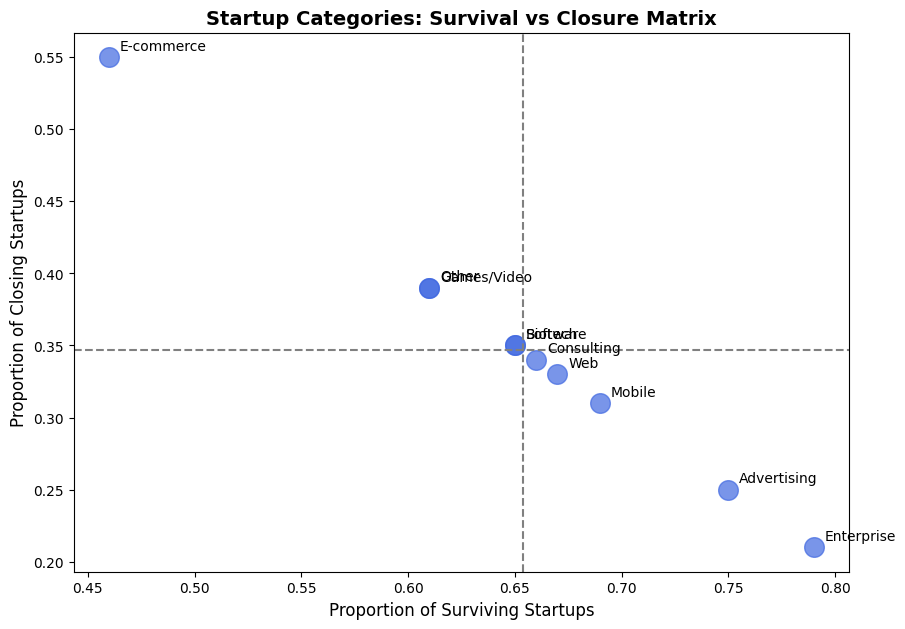

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with your actual proportions)
data = {
    'Category': [
        'Enterprise', 'Advertising', 'Mobile', 'Web', 'Consulting',
        'Biotech', 'Software', 'Games/Video', 'Other', 'E-commerce'
    ],
    'Survival': [0.79, 0.75, 0.69, 0.67, 0.66, 0.65, 0.65, 0.61, 0.61, 0.46],
    'Closure':  [0.21, 0.25, 0.31, 0.33, 0.34, 0.35, 0.35, 0.39, 0.39, 0.55]
}

data = pd.DataFrame(data)

# Plot scatter matrix
plt.figure(figsize=(10,7))
plt.scatter(data['Survival'], data['Closure'], s=200, color='royalblue', alpha=0.7)

# Annotate categories
for i, row in data.iterrows():
    plt.text(row['Survival']+0.005, row['Closure']+0.005, row['Category'], fontsize=10)

# Add quadrant reference lines (average survival & closure)
surv_mean = data['Survival'].mean()
clos_mean = data['Closure'].mean()
plt.axvline(surv_mean, color='gray', linestyle='--')
plt.axhline(clos_mean, color='gray', linestyle='--')

# Labels & Title
plt.xlabel('Proportion of Surviving Startups', fontsize=12)
plt.ylabel('Proportion of Closing Startups', fontsize=12)
plt.title('Startup Categories: Survival vs Closure Matrix', fontsize=14, fontweight='bold')

plt.show()


In [ ]:
# Which category has the largest number Success Rate
data1 = df[df['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = df[df['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=df.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate

category_code  total_success  total_closed  total_startup  success_rate
27            travel              6             1              7         85.71
17              news              6             1              7         85.71
1          analytics             14             3             17         82.35
8         enterprise             50            13             63         79.37
23          security             14             4             18         77.78
0        advertising             42            14             56         75.00
7          education              3             1              4         75.00
16   network_hosting             22             9             31         70.97
15            mobile             46            21             67         68.66
24     semiconductor             23            11             34         67.65
28               web             83            40            123         67.48
19       photo_video              4             2              6         66.67
10           finance              4             2              6         66.67
5         consulting              2             1              3         66.67
3            biotech             21            11             32         65.62
26          software             95            50            145         65.52
9            fashion              5             3              8         62.50
11       games_video             28            18             46         60.87
25            social              6             4             10         60.00
14         messaging              6             4             10         60.00
13           medical              4             3              7         57.14
21       real_estate              1             1              2         50.00
2         automotive              1             1              2         50.00
6          ecommerce             10            12             22         45.45
22            search              4             5              9         44.44
20  public_relations             10            13             23         43.48
4          cleantech              9            13             22         40.91
12          hardware             10            16             26         38.46
18             other              2             8             10         20.00

In [ ]:
px.bar(most_succes_rate,
             x='category_code', y='success_rate',
             title='Success Rate of Startup based on category',
             text="success_rate",
             labels={'category_code': 'category_code', 'success_rate': 'Success Rate of Start Up (in percent %)'})


###Top 20 Startups by Avg_participant

In [ ]:
df_participant = df.pivot_table(index='name', values='avg_participants').sort_values('avg_participants', ascending=False).reset_index()

fig = px.bar(df_participant.head(20),
             x='name', y='avg_participants',
             title='Top 20 Startups by Avg_participant',
             labels={'avg_participants': 'Avg_participants', 'name': 'Name of Startups'})
fig.show()

In [ ]:
fig = px.box(df, x='status', y='avg_participants',
             title='avg_participants vs. Acquired startup',
             labels={'status': 'Acquired (1 = Yes, 0 = No)', 'avg_participants': 'avg_participants'})
fig.show()

# Statistical summary
print(df.groupby('status')['avg_participants'].describe())

        count      mean       std  min  25%     50%  75%   max
status                                                        
0       287.0  2.431699  1.675829  1.0  1.0  2.0000  3.0  10.0
1       542.0  3.143820  1.971823  1.0  2.0  2.6667  4.0  16.0


###How Many Startups Are Still Operating?

In [ ]:
#How Many Startups Are Still Operating?
df_operating = df['status'].value_counts()
df_operating.index = df_operating.index.map(status_labels)

fig = px.pie(df_operating, values=df_operating.values, names=df_operating.index, title='How Many Startups Are Still Operating')
fig.show()

###Round Stages on Startups

In [ ]:
# Comparing status with has_roundA, has_roundB, has_roundC, has_roundD
rr = df.groupby('status')[['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']].mean()
#rr['roundA_pct'] = rr['has_roundA'] / rr['has_roundA'].sum()
#rr['roundB_pct'] = rr['has_roundB'] / rr['has_roundB'].sum()
#rr['roundC_pct'] = rr['has_roundC'] / rr['has_roundC'].sum()
#rr['roundD_pct'] = rr['has_roundD'] / rr['has_roundD'].sum()
# rr.drop(['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD'], axis=1, inplace=True)
#rr['status_label'] = rr['status'].map(status_labels)
rr

has_roundA  has_roundB  has_roundC  has_roundD
status                                                
0         0.404181    0.264808    0.153310    0.048780
1         0.573801    0.483395    0.287823    0.136531

In [ ]:
# Comparing status with has_roundA, has_roundB, has_roundC, has_roundD
rounds = df.groupby('status')[['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']].mean().reset_index()
rounds['roundA_pct'] = rounds['has_roundA'] / rounds['has_roundA'].sum() * 100
rounds['roundB_pct'] = rounds['has_roundB'] / rounds['has_roundB'].sum() * 100
rounds['roundC_pct'] = rounds['has_roundC'] / rounds['has_roundC'].sum() * 100
rounds['roundD_pct'] = rounds['has_roundD'] / rounds['has_roundD'].sum() * 100
#rounds.drop(['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD'], axis=1, inplace=True)
rounds['status_label'] = rounds['status'].map(status_labels)
rounds

status  has_roundA  has_roundB  has_roundC  has_roundD  roundA_pct  \
0       0    0.404181    0.264808    0.153310    0.048780   41.328083   
1       1    0.573801    0.483395    0.287823    0.136531   58.671917   

   roundB_pct  roundC_pct  roundD_pct status_label  
0   35.392573   34.753716   26.323458       Closed  
1   64.607427   65.246284   73.676542     Acquired

In [ ]:
fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Round A', 'Round B', 'Round C', 'Round D'])

fig.add_trace(go.Pie(labels=rounds['status_label'], values=rounds['roundA_pct'], name='Round A'), 1, 1)
fig.add_trace(go.Pie(labels=rounds['status_label'], values=rounds['roundB_pct'], name='Round B'), 1, 2)
fig.add_trace(go.Pie(labels=rounds['status_label'], values=rounds['roundC_pct'], name='Round C'), 1, 3)
fig.add_trace(go.Pie(labels=rounds['status_label'], values=rounds['roundD_pct'], name='Round D'), 1, 4)
fig.update_layout(title_text='Stages of Startup Lifecycle: Rounds A, B, C, and D')

fig.show()

From the chart above we can said that :
- The features has_RoundA, has_RoundB, has_RoundC, and has_RoundD are usually dominated by acquired startups.
- The complex stage funding is the lower closed startup get only 30% in round D



- Round A = usually for promotion and marketing
- Round B = more market coverage and opening more stores
- Round C = Large Expansions
- Round D = Prototype of new product, research and improvement.


###How many Startup listed in 'is_top500'

In [ ]:
#How many Startup listed in 'is_top500'
df_top = df.groupby(['is_top500','status']).size().reset_index(name='count').sort_values(by='count')
df_top.columns=['is_top500','status','count']
df_top

is_top500  status  count
1          0       1     49
0          0       0     95
2          1       0    192
3          1       1    493

In [ ]:
#How many startups in the Top 500 have been categorized as closed or acquired.
df_top['status_label'] = df_top['status'].map(status_labels)

fig = px.bar(df_top, x='is_top500', y='count',
             color='status_label', barmode='group',
             title='How many startups in the Top 500 have been categorized as closed or acquired',
             labels={'is_top500' : 'Is Top 500 Startup', 'count' : 'Number of Startups', 'stattus_label' : 'Status'})
fig.show()

###How many startups have received Venture Capital

In [ ]:
#How many startups have received venture capital, categorized by their current status.
df_vc = df.groupby(['has_VC','status']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_vc.columns=['has_VC','status','count']
df_vc['status_label'] = df_vc['status'].map(status_labels)

fig = px.bar(df_vc, x='has_VC', y='count',
             color='status_label', barmode='group',
             title='Number of Startups with VC Funding by Status',
             labels={'has_VC' : 'Is Startup has_VC', 'count' : 'Number of Startups', 'status_label' : 'Status'})
fig.show()

###How many startups have received Angel Investor

In [ ]:
#How many startups have received Angel Investor, categorized by their current status.
df_angel = df.groupby(['has_angel','status']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_angel.columns=['has_angel','status','count']
df_angel['status_label'] = df_angel['status'].map(status_labels)

fig = px.bar(df_angel, x='has_angel', y='count',
             color='status_label', barmode='group',
             title='Number of Startups with Angel Investor by Status',
             labels={'has_angel' : 'Is Startup has_angel', 'count' : 'Number of Startups', 'status_label' : 'Status'})
fig.show()

###First Funding is Time Difference

In [ ]:
#First Funding is Time Difference from Funded At to First Fund
fig = px.histogram(df, x='get_first_funding',
                   title='Distribution of Time to First Funding',
                   labels={'get_first_funding': 'Days to First Funding'})
fig.show()

In [ ]:
#How many years does it take, on average, for a startup to secure its first funding?
df['get_first_funding'].mean()

884.8443908323281

In [ ]:
#Calculate the Mean from all the Closed Startup
avg = round(885 / 365, 2)
print('Average Time to First Funding for Startups :', avg ,'Years')

Average Time to First Funding for Startups : 2.42 Years


Funding source analysis

In [ ]:
# Compare get_first_funding vs Failed and Successful Startups
fig = px.box(df, x='status', y='get_first_funding',
             title='get_first_funding vs. Acquired startup',
             labels={'status': 'Acquired (1 = Yes, 0 = No)', 'get_first_funding': '(Days) until get first funding'})
fig.show()

# Statistical summary
print(df.groupby('status')['get_first_funding'].describe())

        count         mean          std  min     25%    50%     75%     max
status                                                                     
0       287.0  1039.045296  1194.860624  0.0  247.00  669.0  1490.0  7992.0
1       542.0   803.191882   707.907781  0.0  248.25  576.5  1307.5  2751.0


In [ ]:
#Correlation between age_first_funding and age_last_funding
fig = px.scatter(df, x='age_first_funding_year', y='age_last_funding_year', trendline='ols',
      title='Correlation between age_first_funding_year and age_last_funding_year')

fig.show()

We see that 'age_first_funding_year' and 'age_last_funding_year' are really positively correlated whereas when one increases, the other also increases—mostly.

In [ ]:
#Correlation between age_first_milestone_year and age_last_milestone_year
fig = px.scatter(df, x='age_first_milestone_year', y='age_last_milestone_year', trendline='ols',
      title='Correlation between age_first_milestone_year and age_last_milestone_year')

fig.show()

We see that 'age_first_milestones_year' and 'age_last_milestones_year' have Strong positive correlation, As the age at first funding increases, the age at last funding also tends to increase. This makes sense: the later a startup gets its first funding, the later its subsequent rounds usually occur.

###Top 20 Startups by Funding Age

How long (in years) a startup has been actively raising funds — from its first funding year to its last funding year.

In [ ]:
#Top 20 Startups by Funding Age That Have Secured Funding
#A look at the leading 20 startups based on their funding age that have successfully acquired funding.
df_funding_acquired = df[df['status'] == 1]
df_fa = df_funding_acquired.pivot_table(index='name', values='funding_age').sort_values('funding_age', ascending=False).reset_index()

fig = px.bar(df_fa.head(20),
             x='name', y='funding_age',
             title='Top 20 Startups by Funding Age: Currently Acquired',
             labels={'funding_age': 'funding_age  (in Years)', 'name': 'Name of Startups'})
fig.show()

In [ ]:
#Top 20 Startups by Funding Age That Have Closed
#A glimpse at the leading 20 startups based on their funding age that are no longer operational.
df_funding_closed = df[df['status'] == 0]
df_fc = df_funding_closed.pivot_table(index='name', values='funding_age').sort_values('funding_age', ascending=False).reset_index()

fig = px.bar(df_fc.head(20),
             x='name', y='funding_age',
             title='#Top 20 Startups by Funding Age That Have Closed',
             labels={'funding_age': 'funding_age  (in Years)', 'name': 'Name of Startups'})
fig.show()

In [ ]:
# Compare Funding_age vs Failed-Successful Startups
fig = px.box(df, x='status', y='funding_age',
             title='Funding_age vs. Acquired startup',
             labels={'status': 'Acquired (1 = Yes, 0 = No)', 'funding_age': '(In Years) How long (in years) a startup has been actively raising funds?'})
fig.show()

# Statistical summary
print(df.groupby('status')['funding_age'].describe())

        count      mean       std  min  25%    50%       75%      max
status                                                               
0       287.0  1.086840  1.604611  0.0  0.0  0.000  1.772600   7.3507
1       542.0  2.026908  2.024170  0.0  0.0  1.611  3.241775  10.8192


In [ ]:
#how long (in years) a startup has been actively raising funds — from its first funding year to its last funding year.
print(f"Average Startups actively raising funds : {df['funding_age'].mean():.2f} years")

Average Startups actively raising funds : 1.70 years


Interpretation for startups:

funding_age = 0 → The startup only raised money once (first and last funding happened in the same year).

funding_age > 0 → The startup had multiple funding rounds spread across time, so it was able to attract investors over several years.

Longer funding_age → Could indicate sustained investor interest, growth, or a longer fundraising lifecycle.

Shorter funding_age → Could suggest: The startup either got acquired/closed soon after raising,Or it raised a big round early and didn’t need additional funding,Or it failed to attract follow-up funding.

###The Distribution of Viability Lifespan

In [ ]:
#How Many Startups Are Still Operating?
df_closed = df[df['lifespan'] > 0 ]


In [ ]:
#The Distribution of Viability Until Startup Closure
fig = px.histogram(df_closed, x='lifespan',
                   title='The Distribution of Viability Until Startup Closure',
                   labels={'lifespan': 'Viability of Closed Startups (in days)'})
fig.show()

The data exhibits a positive skew, with a peak occurring around 1,000 to 2,000 days (approximately 3 to 5.5 years). As lifespan increases, the frequency of startups gradually declines, suggesting that fewer startups manage to survive for extended periods before ultimately closing.

The questions are:

  - Do 20% of startups fail within the first year?

  - Do 65% of startups fail within 10 years?

In [ ]:
# Calculate the percentage of startups with a lifespan of less than 365 days.
oneyear = df_closed[df_closed['lifespan'] < 365].shape[0] / df_closed.shape[0] * 100

# Calculate the percentage of startups with a lifespan of less than 1000 days or 3 years
threeyears = df_closed[df_closed['lifespan'] < 1000].shape[0] / df_closed.shape[0] * 100

# Calculate the percentage of startups with a lifespan of less than 3650 days or 10 years
tenyears = df_closed[df_closed['lifespan'] < 3650].shape[0] / df_closed.shape[0] * 100

# Calculate the year when the percentage reaches 65%.
sixyears = df_closed[df_closed['lifespan'] < 2390].shape[0] / df_closed.shape[0] * 100

print(f'{oneyear:.2f}% startups fail in the first year')
print(f'{threeyears:.2f}% startups fail in 3 years')
print(f'{tenyears:.2f}% startups fail in 10 years')
print(f'{sixyears:.2f}% startups fail in 6,5 years')

# Average lifespan
print(f"Average lifespan of failed startups: {df_closed['lifespan'].mean()/365:.1f} years")

1.39% startups fail in the first year
16.72% startups fail in 3 years
83.97% startups fail in 10 years
58.89% startups fail in 6,5 years
Average lifespan of failed startups: 6.3 years


Our findings reveal some surprising trends:

  Only 4% of startups close within their first year and the failure rate reaching 12% after three years.
  However, this figure escalates to 20% by 6.5 years. Ultimately, 84% of startups fail within a decade, indicating a concerning trend that shortens the average lifespan of startups.

###Investing Feature on Acquired Startup


In [ ]:
# Count 1s and 0s for each binary feature
df_invest = df[(df["status"] == 1)]

funding_counts = {}
for col in ['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']:
    funding_counts[col] = {
        "have_feature (1)": df_invest[col].sum(),
        "no_feature (0)": (df_invest[col] == 0).sum()}

status_colors = {
    '1': 'blue',
    '0': 'red'}

# Convert to DataFrame for nicer display
funding_counts_df = pd.DataFrame(funding_counts).T.reset_index()
funding_counts_df = funding_counts_df.rename(columns={'index': 'Feature'})

# Melt the DataFrame to long format for plotting
funding_counts_melted = funding_counts_df.melt(id_vars='Feature', var_name='Has Feature', value_name='Count')

fig = px.bar(funding_counts_melted, x='Feature', y='Count',
             color='Has Feature', barmode='group',
             title='Investing Feature on Acquired Startup',
             labels={'Feature' : 'Funding Feature', 'Count' : 'Number of Startups', 'Has Feature' : 'Has Feature'})
fig.show()

**has_RoundA, has_RoundB, has_RoundC, has_RoundD**

The term has_RoundA, has_RoundB, has_RoundC, has_RoundD refers to the stages of funding a startup has undergone, where:

  - Round A: The first significant round of venture capital financing, typically used to scale operations, develop products, or expand the team.

  - Round B: A follow-up round aimed at further scaling the business, often after initial successes in Round A.

  - Round C: Additional funding to help the startup expand into new markets, develop new products, or prepare for an IPO.

  - Round D: This round may be for late-stage funding, often used to solidify the company’s position before a public offering or acquisition.


## Gaining Insights from Failed and Successful Startups

In [ ]:
#How many startups has Multiple Funding Round (A,B,C,D)
df_hasround = df.groupby(['has_RoundABCD','status']).size().reset_index(name='count').sort_values(by='count')
df_hasround['status_label'] = df_hasround['status'].map(status_labels)

fig = px.bar(df_hasround, x='has_RoundABCD', y='count',
             color='status_label', barmode='group',
             title='How many startups has Multiple Funding Round (A,B,C,D)',
             labels={'has_RoundABCD' : 'has_RoundABCD', 'count' : 'Number of Startups', 'stattus_label' : 'Status'})
fig.show()



In [ ]:
#How many startups has both has_VC and has_angel
df_angelvc = df.groupby(['has_Investor','status']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_angelvc['status_label'] = df_angelvc['status'].map(status_labels)

fig = px.bar(df_angelvc, x='has_Investor', y='count',
             color='status_label', barmode='group',
             title='Secured Funding from Both Venture Capital Firms and Angel Investors',
             labels={'has_Investor' : 'has_Investor (Angel Investor and Venture Capital)', 'count' : 'Number of Startups', 'stattus_label' : 'Status'})
fig.show()

**Received funding from both venture capital (VC) firms and angel investors**

has_VC: This means the startup has secured investment from venture capital firms, which typically invest larger sums of money in exchange for equity. VC funding often comes with expectations for significant growth and may involve more structured support, including strategic guidance and access to networks.

has_angel: This indicates that the startup has also attracted investment from angel investors, who are usually high-net-worth individuals providing financial support in the early stages of a startup. Angel investors often bring not only capital but also mentorship and industry connections.



In [ ]:
#How many startups has seed aspects of a startups funding journey:
df_seeds = df.groupby(['has_Seed','status']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_seeds['status_label'] = df_seeds['status'].map(status_labels)

fig = px.bar(df_seeds, x='has_Seed', y='count',
             color='status_label', barmode='group',
             title='How many startups has seed aspects: Has VC, Has Angel, Has Round A,B,C,D ',
             labels={'has_Seed' : 'has_Seed (Has VC, Has Angel, Has Round A,B,C,D)', 'count' : 'Number of Startups', 'stattus_label' : 'Status'})
fig.show()

**has_Seed combination for startup's potential for growth**



  -  Seed: Refers to the initial funding stage where the startup seeks capital to develop its idea, build a prototype, or conduct market research. This funding is often crucial for laying the groundwork. **Seed = before or just after launch. has_angel from personal and VC from venture capital/ owners.**

  -  has_RoundABCD: This signifies that the startup has progressed through various funding rounds (A, B, C, D), indicating a history of successful fundraising and growth. Each round typically corresponds to different stages of development and scaling.

  -  has_Investor: This indicates that the startup has attracted various investors, which can include venture capitalists, angel investors, or institutional backers, providing essential financial support.





In [ ]:
#How many startups classified as Non-Funded Startup:
df_nonfunded = df.groupby(['Non_Funded_Startup','status']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_nonfunded['status_label'] = df_nonfunded['status'].map(status_labels)

fig = px.bar(df_nonfunded, x='Non_Funded_Startup', y='count',
             color='status_label', barmode='group',
             title='How many startups classified as Non-Funded Startup',
             labels={'Non_Funded_Startup' : 'Non-Funded Startup (Unfunded by: VC, Angel, and Round A,B,C,D)', 'count' : 'Number of Startups', 'stattus_label' : 'Status'})
fig.show()

**Non-Funded Startup**

The term refers to a startup that lacks funding from venture capital (VC) firms, angel investors, and has not completed any institutional funding rounds (A, B, C, or D). This situation presents various possibilities, including:

-  Bootstrapped Startup → funded only by founders’ own money or revenue.

-  Self-funded Startup → same meaning, sometimes used interchangeably.

-  Non-funded Startup → not an official industry term, but often used in reports/analysis (like the way you wrote it).


In [ ]:
#List of Non_Funded_Startup Company
df[df['Non_Funded_Startup'] == 1 ]


Unnamed: 0 state_code   latitude   longitude    zip_code        id  \
51          847         MA  42.360253  -71.058291        2210   c:49815   
68          452         CA  37.547630 -122.307887  94403-1855   c:26128   
116         574         CA  37.584103 -122.366082       94010   c:31968   
136         873         CA  37.404788 -121.940842       95134   c:51745   
200         196         CA  34.019657 -118.487549       90405  c:162116   
201         906         IL  41.817807  -88.173402       60555   c:55044   
222         487         CA  37.781689 -122.391061       94107     c:278   
261         185         MA  42.496515  -71.480233        1719   c:16070   
318          64         CO  39.540323 -104.857271       80112   c:12285   
423        1080         CA  37.222698 -121.979887       95030   c:80259   
472        1027         CA  34.054935 -118.244476       90049   c:71372   
479         673         NM  35.084103 -106.650985       87102   c:38504   
511         831         CA  37.386778 -121.966277       95054   c:47689   
526         980         NY  40.728425  -73.999882       10012   c:62802   
534         818         MA  42.493447  -71.514104        1719   c:46889   
635         684         CA  37.779281 -122.419236       94133   c:39399   
648         878         WA  47.603832 -122.330062       98121   c:52346   
652         282         CA  37.661002 -121.897829       94566   c:17724   
666         616         CA  39.783730 -100.445882       94025   c:35148   
685        1036         NY  40.730646  -73.986614       10013   c:72750   
705         126         CA  37.288326 -121.945633       95008  c:146596   
748        1024         NY  40.728425  -73.999882       10012   c:70661   
769         208         NY  40.730646  -73.986614       10005  c:163104   
871         558         CA  37.400115 -122.052208       94303   c:31559   

              city              Unnamed: 6                   name founded_at  \
51          Boston          Boston MA 2210             AisleBuyer 2009-01-01   
68       San Mateo                     NaN          Sana Security 2000-01-01   
116     Burlingame     Burlingame CA 94010    Origen Therapeutics 1997-01-01   
136       San Jose       San Jose CA 95134               Wellcore 2007-01-01   
200   Santa Monica   Santa Monica CA 90405             Gradient X 2012-01-01   
201    Warrenville    Warrenville IL 60555  ezzai - how to arabia 2010-08-01   
222  San Francisco                     NaN           DeliveryEdge 2006-09-01   
261     Boxborough                     NaN      Crossbeam Systems 2000-01-01   
318      Englewood                     NaN               MX Logic 2002-01-01   
423      Los Gatos      Los Gatos CA 95030                 Eyeona 2011-01-01   
472    Los Angeles    Los Angeles CA 90049              nprogress 2010-02-01   
479    Albuquerque    Albuquerque NM 87102           iosil Energy 2007-01-01   
511    Santa Clara    Santa Clara CA 95054                 Atrica 2000-01-01   
526       New York       New York NY 10012                   Jumo 2010-02-01   
534     Boxborough      Boxborough MA 1719      FireStar Software 2001-01-01   
635  San Francisco  San Francisco CA 94133               Sweepery 2008-08-01   
648        Seattle        Seattle WA 98121                  Wavii 2009-03-01   
652     Pleasanton                     NaN   Echopass Corporation 2000-01-01   
666     Menlo Park     Menlo Park CA 94025                 Devtap 2008-01-01   
685       New York       New York NY 10013               Snapette 2011-01-01   
705       Campbell       Campbell CA 95008               AdexLink 2010-08-16   
748       New York       New York NY 10012              StyleTrek 2010-02-01   
769       New York       New York NY 10005               #waywire 2012-06-01   
871  Mountain View                     NaN   Reliant Technologies 2001-01-01   

     closed_at first_funding_at last_funding_at  age_first_funding_year  \
51         NaT       2010-11-23      2011-06-13      

Overview of Non-Funded Startups

  Among the 24 non-funded startups, 16 are recognized as part of the Top 500 Startups. Currently, only 11 of these startups remain operational, and most of them domiciled in California

# Drop Column

We're gonna drop some columns and anything computed using future information like age_last_funding_year, age_last_milestone_year.

         ['Unnamed: 6','state_code.1','zip_code','id','Unnamed: 0','object_id',
         'state_code', 'name', 'latitude', 'longitude', 'first_funding_at',
         'last_funding_at', 'founded_at', 'closed_at', 'category_code', 'city',
         'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web',
         'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
         'is_biotech', 'is_consulting', 'is_othercategory',
         'lifespan', 'age_last_funding_year', 'age_last_milestone_year','funding_age','get_first_funding']

In [ ]:
# Drop Unnecessary Columns
df.drop(['Unnamed: 6','state_code.1','zip_code','id','Unnamed: 0','object_id',
     'state_code', 'name', 'latitude', 'longitude', 'first_funding_at',
     'last_funding_at', 'founded_at', 'closed_at', 'category_code', 'city',
     'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web',
     'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
     'is_biotech', 'is_consulting', 'is_othercategory',
     'lifespan', 'age_last_funding_year', 'age_last_milestone_year','funding_age','get_first_funding'],axis = 1,inplace = True)

In [ ]:
df.describe()

age_first_funding_year  age_first_milestone_year  relationships  \
count              829.000000                829.000000     829.000000   
mean                 2.424230                  2.795311       7.715320   
std                  2.500782                  2.848600       7.289627   
min                  0.000000                  0.000000       0.000000   
25%                  0.679500                  0.328800       3.000000   
50%                  1.665800                  2.161600       5.000000   
75%                  3.756200                  4.087700      10.000000   
max                 21.895900                 24.684900      63.000000   

       funding_rounds  funding_total_usd  milestones      has_VC   has_angel  \
count      829.000000       8.290000e+02  829.000000  829.000000  829.000000   
mean         2.319662       2.035307e+07    1.816647    0.328106    0.231604   
std          1.406631       3.292882e+07    1.327037    0.469807    0.422112   
min          1.000000       1.100000e+04    0.000000    0.000000    0.000000   
25%          1.000000       3.282327e+06    1.000000    0.000000    0.000000   
50%          2.000000       1.050000e+07    2.000000    0.000000    0.000000   
75%          3.000000       2.530500e+07    3.000000    1.000000    0.000000   
max         10.000000       5.100000e+08    8.000000    1.000000    1.000000   

       has_roundA  has_roundB  has_roundC  has_roundD  avg_participants  \
count  829.000000  829.000000  829.000000  829.000000        829.000000   
mean     0.515078    0.407720    0.241255    0.106152          2.897284   
std      0.500074    0.491707    0.428103    0.308218          1.904043   
min      0.000000    0.000000    0.000000    0.000000          1.000000   
25%      0.000000    0.000000    0.000000    0.000000          1.500000   
50%      1.000000    0.000000    0.000000    0.000000          2.500000   
75%      1.000000    1.000000    0.000000    0.000000          4.000000   
max      1.000000    1.000000    1.000000    1.000000         16.000000   

        is_top500      status  has_RoundABCD  has_Investor    has_Seed  \
count  829.000000  829.000000     829.000000    829.000000  829.000000   
mean     0.826297    0.653800       0.758745      0.522316    0.212304   
std      0.379083    0.476045       0.428103      0.499803    0.409186   
min      0.000000    0.000000       0.000000      0.000000    0.000000   
25%      1.000000    0.000000       1.000000      0.000000    0.000000   
50%      1.000000    1.000000       1.000000      1.000000    0.000000   
75%      1.000000    1.000000       1.000000      1.000000    0.000000   
max      1.000000    1.000000       1.000000      1.000000    1.000000   

       Non_Funded_Startup  
count          829.000000  
mean             0.028951  
std              0.167769  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              1.000000

# Handling Outliers

In [ ]:
columns = ['age_first_funding_year','age_first_milestone_year','relationships','funding_rounds','funding_total_usd',
           'milestones','avg_participants']

for col in columns:
    fig = px.box(df, y=col, title=f'Boxplot of {col}')
    fig.show()

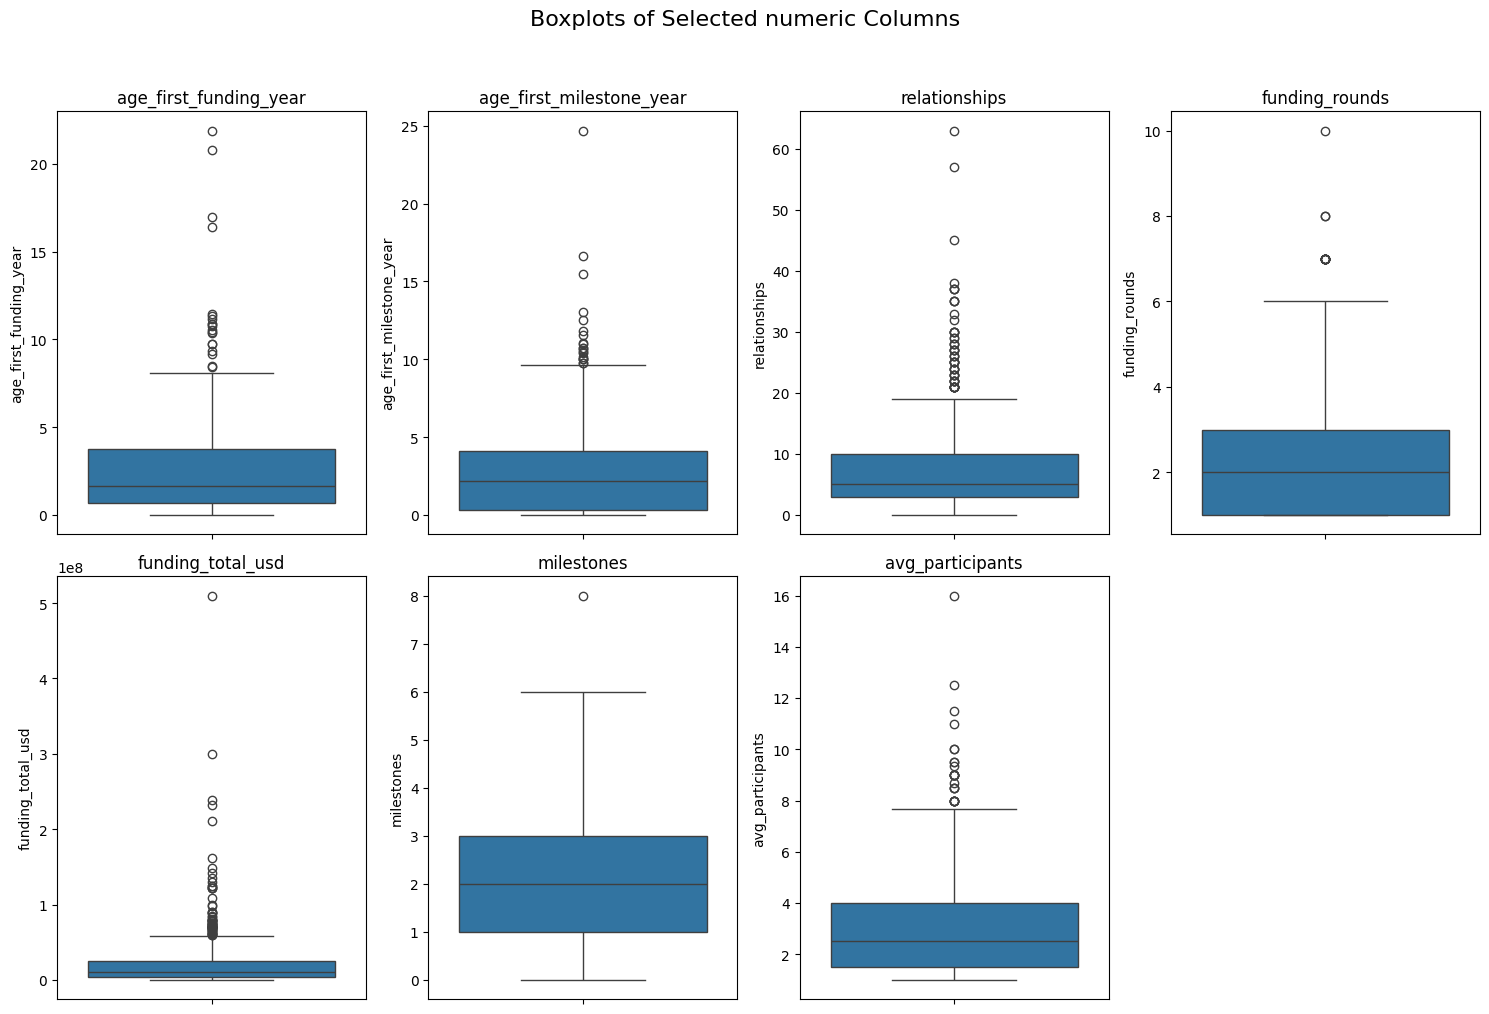

In [ ]:
columns = ['age_first_funding_year','age_first_milestone_year','relationships','funding_rounds','funding_total_usd',
           'milestones','avg_participants']

# Checking Outliers in every numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle("Boxplots of Selected numeric Columns", fontsize=16)

# Loop through the columns and plot each one as a boxplot
for i, col in enumerate(columns, 1):
    plt.subplot(3, 4, i) # Changed to 3 rows and 4 columns
    sns.boxplot(y=df[col])
    plt.title(col)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- Log-transformation of the Features 'funding_total_usd' so the model doesn’t get dominated by mega-funded startups.

- And leave the other features as it is, because of small integers (0–20) not extreme enough to need log.

In [ ]:
df['funding_total_usd'] = np.log1p(df['funding_total_usd'])

# Data Splitting

In [ ]:
# Feature and Target Split
X = df.drop(['status'], axis=1)
y = df["status"]

# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, stratify = y, random_state= 42)


In [ ]:
X_train.columns

Index(['age_first_funding_year', 'age_first_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'has_RoundABCD', 'has_Investor',
       'has_Seed', 'Non_Funded_Startup'],
      dtype='object')

In [ ]:
X_train.shape

(663, 18)

In [ ]:
y_train.shape

(663,)

In [ ]:
X_train

age_first_funding_year  age_first_milestone_year  relationships  \
668                  0.0822                    1.0849              7   
203                  1.8384                    5.6740              4   
283                  0.0000                    0.7370              2   
206                  1.1699                    0.0849              3   
871                  6.2986                    6.0027              9   
..                      ...                       ...            ...   
586                  1.6658                    5.8356             27   
658                  1.9562                    3.4986              1   
598                  1.4603                    6.4192              4   
417                  0.0000                    0.1096              2   
707                  3.0356                    4.0027              2   

     funding_rounds  funding_total_usd  milestones  has_VC  has_angel  \
668               3          15.201805           2       0          1   
203               2          15.404746           5       0          1   
283               1          10.819798           1       0          1   
206               2          15.363073           4       0          1   
871               1          16.523561           1       0          0   
..              ...                ...         ...     ...        ...   
586               6          18.178609           3       0          0   
658               2          14.694515           1       0          1   
598               3          17.875954           1       0          0   
417               1          15.424949           1       0          0   
707               3          17.312018           1       0          0   

     has_roundA  has_roundB  has_roundC  has_roundD  avg_participants  \
668           1           0           0           0               2.0   
203           0           1           0           0               1.5   
283           0           0           0           0               2.0   
206           1           0           0           0               1.5   
871           0           0           0           0               3.0   
..          ...         ...         ...         ...               ...   
586           1           1           1           1               3.4   
658           0           0           0           0               3.0   
598           1           1           1           0               5.0   
417           1           0           0           0               2.0   
707           1           1           1           0               4.0   

     is_top500  has_RoundABCD  has_Investor  has_Seed  Non_Funded_Startup  
668          1              1             1         0                   0  
203          1              1             1         0                   0  
283          0              0             1         1                   0  
206          1              1             1         0                   0  
871          1              0             0         0                   1  
..         ...            ...           ...       ...                 ...  
586          1              1             0         0                   0  
658          1              0             1         1                   0  
598          1              1             0         0                   0  
417          0              1             0         0                   0  
707          1              1             0         0                   0  

[663 rows x 18 columns]

# Multicollinearity Check

In [ ]:
df_temp = pd.concat([X_train, y_train], axis=1)
df_temp.dtypes

age_first_funding_year      float64
age_first_milestone_year    float64
relationships                 int64
funding_rounds                int64
funding_total_usd           float64
milestones                    int64
has_VC                        int64
has_angel                     int64
has_roundA                    int64
has_roundB                    int64
has_roundC                    int64
has_roundD                    int64
avg_participants            float64
is_top500                     int64
has_RoundABCD                 int64
has_Investor                  int64
has_Seed                      int64
Non_Funded_Startup            int64
status                        int64
dtype: object

In [ ]:
df_temp = pd.concat([X_train, y_train], axis=1)
corr_= df_temp.corr().round(4)

fig = px.imshow(corr_, text_auto=True, aspect="auto",
                 title="Data Correlation Mapping",
                 color_continuous_scale='RdBu_r')

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(range(len(corr_.columns))),
        ticktext = corr_.columns.tolist()),
    yaxis = dict(
        tickmode = 'array',
        tickvals = list(range(len(corr_.index))),
        ticktext = corr_.index.tolist()))

fig.show()

Base on General Benchmark for Correlation, a value of 0.60 – 0.79 → is classify as Strong correlation, and we found it as follows:

1. has_VC ↔ has_Investor: 0.6654 → Strong positive correlation, this due to startups with VC usually have investors

2. has_RoundABCD ↔ Non_Funded_Startup: –0.9208 → Very strong negative correlation, because once a startup is non-funded, it definitely won’t have Round A/B/C/D.

# Scaling

In [ ]:
X_train.head()

age_first_funding_year  age_first_milestone_year  relationships  \
668                  0.0822                    1.0849              7   
203                  1.8384                    5.6740              4   
283                  0.0000                    0.7370              2   
206                  1.1699                    0.0849              3   
871                  6.2986                    6.0027              9   

     funding_rounds  funding_total_usd  milestones  has_VC  has_angel  \
668               3          15.201805           2       0          1   
203               2          15.404746           5       0          1   
283               1          10.819798           1       0          1   
206               2          15.363073           4       0          1   
871               1          16.523561           1       0          0   

     has_roundA  has_roundB  has_roundC  has_roundD  avg_participants  \
668           1           0           0           0               2.0   
203           0           1           0           0               1.5   
283           0           0           0           0               2.0   
206           1           0           0           0               1.5   
871           0           0           0           0               3.0   

     is_top500  has_RoundABCD  has_Investor  has_Seed  Non_Funded_Startup  
668          1              1             1         0                   0  
203          1              1             1         0                   0  
283          0              0             1         1                   0  
206          1              1             1         0                   0  
871          1              0             0         0                   1

In [ ]:
#Initialize the scaler (use StandardScaler for standardization or MinMaxScaler for normalization)
scaler = StandardScaler()

# Fit the scaler on the training set and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape

(663, 18)

# Modeling

##LGBM Classifier

In [ ]:
# define LGBM model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 433, number of negative: 230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 663, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.653092 -> initscore=0.632658
[LightGBM] [Info] Start training from score 0.632658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(random_state=42)

In [ ]:
# LGBM prediction
lgbm_pred = lgbm.predict(X_test_scaled)
lgbm_pred_proba = lgbm.predict_proba(X_test_scaled)

# printing the test accuracy
print('Performa Testing LGBM:' , accuracy_score(y_test, lgbm_pred), end='\n\n')
print(classification_report(y_test, lgbm_pred))

Performa Testing LGBM: 0.8012048192771084

              precision    recall  f1-score   support

           0       0.71      0.72      0.71        57
           1       0.85      0.84      0.85       109

    accuracy                           0.80       166
   macro avg       0.78      0.78      0.78       166
weighted avg       0.80      0.80      0.80       166



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, lgbm_pred)
print("Confusion Matrix:\n", conf_matrix)
conf_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Pred 0", "Pred 1"])

fig = px.imshow(conf_df, text_auto=True, color_continuous_scale="YlGnBu", title="Confusion Matrix")
fig.update_layout( xaxis_title="Predicted Label", yaxis_title="True Label", width=700,height=600)
fig.show()

Confusion Matrix:
 [[41 16]
 [17 92]]


##XGBoost Classifier

In [ ]:
#define XGB model
xgb_clf = XGBClassifier(random_state = 1000)

xgb_clf.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test_scaled)
xgb_pred_proba = xgb_clf.predict_proba(X_test_scaled)

# printing the test accuracy
print('Performa Testing XGBoost:' , accuracy_score(y_test, xgb_pred), end='\n\n')
print(classification_report(y_test, xgb_pred))

Performa Testing XGBoost: 0.7831325301204819

              precision    recall  f1-score   support

           0       0.71      0.63      0.67        57
           1       0.82      0.86      0.84       109

    accuracy                           0.78       166
   macro avg       0.76      0.75      0.75       166
weighted avg       0.78      0.78      0.78       166



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_pred)
print("Confusion Matrix:\n", conf_matrix)
conf_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Pred 0", "Pred 1"])

fig = px.imshow(conf_df, text_auto=True, color_continuous_scale="YlGnBu", title="Confusion Matrix")
fig.update_layout( xaxis_title="Predicted Label", yaxis_title="True Label", width=700,height=600)
fig.show()


Confusion Matrix:
 [[36 21]
 [15 94]]


##GradientBoosting Classifier

In [ ]:
# define Random Forest Model
gbc_clf = GradientBoostingClassifier(learning_rate=0.02, max_depth=4, random_state=100, n_estimators=1000)

# fit model to training data
gbc_clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=4, n_estimators=1000,
                           random_state=100)

In [ ]:
# Gradient Boosting prediction
gbc_pred = gbc_clf.predict(X_test_scaled)
gbc_pred_proba = gbc_clf.predict_proba(X_test_scaled)

# printing the test accuracy
print('Performa Testing GradientBoosting:' , accuracy_score(y_test, gbc_pred), end='\n\n')
print(classification_report(y_test, gbc_pred))

Performa Testing GradientBoosting: 0.7951807228915663

              precision    recall  f1-score   support

           0       0.72      0.67      0.69        57
           1       0.83      0.86      0.85       109

    accuracy                           0.80       166
   macro avg       0.77      0.76      0.77       166
weighted avg       0.79      0.80      0.79       166



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, gbc_pred)
print("Confusion Matrix:\n", conf_matrix)
conf_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Pred 0", "Pred 1"])

fig = px.imshow(conf_df, text_auto=True, color_continuous_scale="YlGnBu", title="Confusion Matrix")
fig.update_layout( xaxis_title="Predicted Label", yaxis_title="True Label", width=700,height=600)
fig.show()

Confusion Matrix:
 [[38 19]
 [15 94]]


##AdaBoost Classifier

In [ ]:
# define AdaBoost Classifier
ada_clf = AdaBoostClassifier()

# fit model to training data
ada_clf.fit(X_train_scaled,y_train)


AdaBoostClassifier()

In [ ]:
# AdaBoost prediction
ada_pred = ada_clf.predict(X_test_scaled)
ada_pred_proba = ada_clf.predict_proba(X_test_scaled)

# printing the test accuracy
print('Performa Testing AdaBoost Classifier:' , accuracy_score(y_test, ada_pred), end='\n\n')
print(classification_report(y_test, ada_pred))

Performa Testing AdaBoost Classifier: 0.8072289156626506

              precision    recall  f1-score   support

           0       0.77      0.63      0.69        57
           1       0.82      0.90      0.86       109

    accuracy                           0.81       166
   macro avg       0.79      0.77      0.78       166
weighted avg       0.80      0.81      0.80       166



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, ada_pred)
print("Confusion Matrix:\n", conf_matrix)
conf_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Pred 0", "Pred 1"])

fig = px.imshow(conf_df, text_auto=True, color_continuous_scale="YlGnBu", title="Confusion Matrix")
fig.update_layout( xaxis_title="Predicted Label", yaxis_title="True Label", width=700,height=600)
fig.show()


Confusion Matrix:
 [[36 21]
 [11 98]]


##Logistic Regression

In [ ]:
# define Logistic Regression Model
logreg_clf = LogisticRegression()

# fit model to training data
logreg_clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Logistic Regression prediction
logreg_pred = logreg_clf.predict(X_test_scaled)
logreg_pred_proba = logreg_clf.predict_proba(X_test_scaled)

# printing the test accuracy
print('Performa Testing Logistic Regression:' , accuracy_score(y_test, logreg_pred), end='\n\n')
print(classification_report(y_test, logreg_pred))

Performa Testing Logistic Regression: 0.7710843373493976

              precision    recall  f1-score   support

           0       0.72      0.54      0.62        57
           1       0.79      0.89      0.84       109

    accuracy                           0.77       166
   macro avg       0.75      0.72      0.73       166
weighted avg       0.77      0.77      0.76       166



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, logreg_pred)
print("Confusion Matrix:\n", conf_matrix)
conf_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Pred 0", "Pred 1"])

fig = px.imshow(conf_df, text_auto=True, color_continuous_scale="YlGnBu", title="Confusion Matrix")
fig.update_layout( xaxis_title="Predicted Label", yaxis_title="True Label", width=700,height=600)
fig.show()


Confusion Matrix:
 [[31 26]
 [12 97]]


##Random Forest

In [ ]:
# define Random Forest Model
random_forest_clf = RandomForestClassifier(random_state = 42, n_estimators = 100)

# fit model to training data
random_forest_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Random Forest prediction
rf_pred = random_forest_clf.predict(X_test_scaled)
rf_pred_proba = random_forest_clf.predict_proba(X_test_scaled)

# printing the test accuracy
print('Performa Testing Random Forest:' , accuracy_score(y_test, rf_pred), end='\n\n')
print(classification_report(y_test, rf_pred))

Performa Testing Random Forest: 0.8253012048192772

              precision    recall  f1-score   support

           0       0.80      0.65      0.72        57
           1       0.83      0.92      0.87       109

    accuracy                           0.83       166
   macro avg       0.82      0.78      0.80       166
weighted avg       0.82      0.83      0.82       166



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", conf_matrix)
conf_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Pred 0", "Pred 1"])

fig = px.imshow(conf_df, text_auto=True, color_continuous_scale="YlGnBu", title="Confusion Matrix")
fig.update_layout( xaxis_title="Predicted Label", yaxis_title="True Label", width=700,height=600)
fig.show()


Confusion Matrix:
 [[ 37  20]
 [  9 100]]


# ROC AUC

ROC-AUC is a better metric than accuracy for imbalanced datasets (like startup close vs acquire).

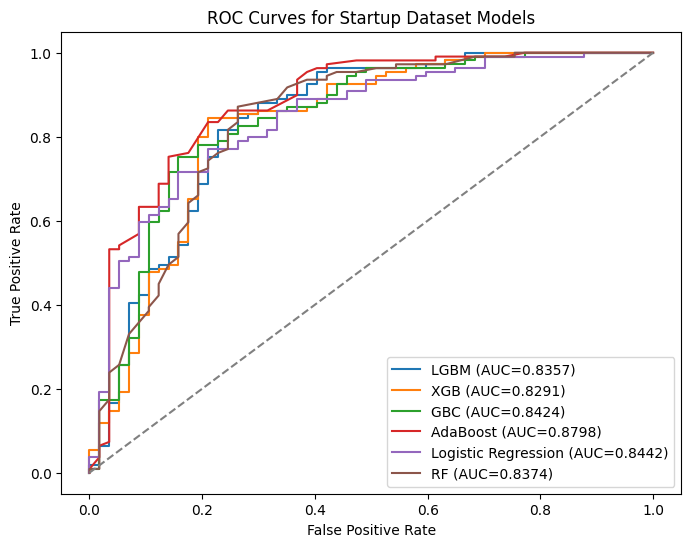

AUC-ROC for LGBM: 0.8356671495251892
AUC-ROC for XGBosster Classifier: 0.8290680830516659
AUC-ROC for GradientBoosting Classifier: 0.8424271688395301
AUC-ROC for AdaBoost Classifier: 0.8798487043296315
AUC-ROC for Logistics Regression: 0.8441976500885241
AUC-ROC for Random Forest Classifier: 0.8374376307741832


In [ ]:
def get_positive_probs(pred_proba):
    # If 2D array → take column 1
    if pred_proba.ndim == 2 and pred_proba.shape[1] > 1:
        return pred_proba[:, 1]
    # If already 1D → return as is
    return pred_proba

def plot_roc_curves(y_test, lgbm_pred_proba, xgb_pred_proba, gbc_pred_proba, ada_pred_proba, logreg_pred_proba, rf_pred_proba):
    plt.figure(figsize=(8, 6))

    # Extract probabilities safely
    lgbm_probs = get_positive_probs(lgbm_pred_proba)
    xgb_probs  = get_positive_probs(xgb_pred_proba)
    gbc_probs  = get_positive_probs(gbc_pred_proba)
    ada_probs  = get_positive_probs(ada_pred_proba)
    logreg_probs = get_positive_probs(logreg_pred_proba)
    rf_probs   = get_positive_probs(rf_pred_proba)

    # Compute ROC + AUC
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, lgbm_probs)
    fpr_xgb, tpr_xgb, _   = roc_curve(y_test, xgb_probs)
    fpr_gbc, tpr_gbc, _   = roc_curve(y_test, gbc_probs)
    fpr_ada, tpr_ada, _   = roc_curve(y_test, ada_probs)
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
    fpr_rf, tpr_rf, _     = roc_curve(y_test, rf_probs)

    auc_lgbm = roc_auc_score(y_test, lgbm_probs)
    auc_xgb  = roc_auc_score(y_test, xgb_probs)
    auc_gbc  = roc_auc_score(y_test, gbc_probs)
    auc_ada  = roc_auc_score(y_test, ada_probs)
    auc_logreg = roc_auc_score(y_test, logreg_probs)
    auc_rf   = roc_auc_score(y_test, rf_probs)


    # Plot
    plt.plot(fpr_lgbm, tpr_lgbm, label=f"LGBM (AUC={auc_lgbm:.4f})")
    plt.plot(fpr_xgb,  tpr_xgb,  label=f"XGB (AUC={auc_xgb:.4f})")
    plt.plot(fpr_gbc,  tpr_gbc,  label=f"GBC (AUC={auc_gbc:.4f})")
    plt.plot(fpr_ada,  tpr_ada,  label=f"AdaBoost (AUC={auc_ada:.4f})")
    plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC={auc_logreg:.4f})")
    plt.plot(fpr_rf,   tpr_rf,   label=f"RF (AUC={auc_rf:.4f})")

    # Random baseline
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Startup Dataset Models")
    plt.legend()
    plt.show()

    return auc_lgbm, auc_xgb, auc_gbc, auc_ada, auc_logreg, auc_rf

auc_lgbm, auc_xgb, auc_gbc, auc_ada, auc_logreg, auc_rf = plot_roc_curves(y_test, lgbm_pred_proba, xgb_pred_proba, gbc_pred_proba, ada_pred_proba, logreg_pred_proba, rf_pred_proba)


print(f'AUC-ROC for LGBM: {auc_lgbm}')
print(f'AUC-ROC for XGBosster Classifier: {auc_xgb}')
print(f'AUC-ROC for GradientBoosting Classifier: {auc_gbc}')
print(f'AUC-ROC for AdaBoost Classifier: {auc_ada}')
print(f'AUC-ROC for Logistics Regression: {auc_logreg}')
print(f'AUC-ROC for Random Forest Classifier: {auc_rf}')

AdaBoost iss the most promising model (highest AUC score), lets improving it further with:

SMOTE → deal with imbalance target.

HPT (Hyperparameter Tuning) → optimize the AdaBoost settings (like n_estimators, learning_rate).

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# define baseline model
ada_scaled = AdaBoostClassifier(random_state=42)

ada_scaled.fit(X_resampled, y_resampled)

AdaBoostClassifier(random_state=42)

In [ ]:
# AdaBoost Classifier prediction
ada_train_pred = ada_scaled.predict(X_resampled)


In [ ]:
# AdaBoost Classifier Test prediction
ada_scaled_pred = ada_scaled.predict(X_test)

# printing the test accuracy
print('Performa Testing SMOTE AdaBoost Classifier:' , accuracy_score(y_test, ada_scaled_pred), end='\n\n')
print(classification_report(y_test, ada_scaled_pred))


Performa Testing SMOTE AdaBoost Classifier: 0.7771084337349398

              precision    recall  f1-score   support

           0       0.66      0.72      0.69        57
           1       0.85      0.81      0.83       109

    accuracy                           0.78       166
   macro avg       0.75      0.76      0.76       166
weighted avg       0.78      0.78      0.78       166



In [ ]:
from sklearn.metrics import roc_auc_score

ada_scaled_proba = ada_scaled.predict_proba(X_test)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, ada_scaled_proba))


AUC-ROC: 0.8639948495090939


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, ada_scaled_pred)
print("Confusion Matrix:\n", conf_matrix)
conf_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Pred 0", "Pred 1"])

fig = px.imshow(conf_df, text_auto=True, color_continuous_scale="YlGnBu", title="Confusion Matrix")
fig.update_layout( xaxis_title="Predicted Label", yaxis_title="True Label", width=700,height=600)
fig.show()

Confusion Matrix:
 [[41 16]
 [21 88]]


Before SMOTE (original imbalanced data) ->

 - Accuracy = 0.8072

 - AUC-ROC = 0.8798

After SMOTE (balanced training set) ->

- Accuracy = 0.7771 (slightly worse)

- AUC-ROC = 0.86399 (slightly worse)

SMOTE reduces bias toward the majority class.

* Accuracy can drop because the model is no longer "cheating" by mostly predicting the majority class.

* Instead, it starts catching more minority class cases, which is valuable in real problems (like fraud detection, medical risk, etc.).

AUC-ROC barely changed.

* This means the model’s ability to separate positive vs. negative classes stayed stable.

* Good sign: SMOTE didn’t harm generalization.

With imbalance, accuracy often goes down after SMOTE, but recall/precision for the minority class usually improve (check classification report!).

AUC-ROC is more reliable here. Since AUC stayed high (~0.88), the model is still strong.

The next step is HPT (hyperparameter tuning) → that might recover the small drop in accuracy and even improve AUC.

# Hyperparameter Tuning

To squeez the best possible performance out of the dataset

In [ ]:
# Define Baseline AdaBoost & Hyperparameter Grid
# Baseline AdaBoost
ada = AdaBoostClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}


In [ ]:
# Run GridSearchCV on Original Training Data (Baseline)
grid_search = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters (Baseline AdaBoost):", grid_search.best_params_)
print("Best CV AUC-ROC:", grid_search.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters (Baseline AdaBoost): {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 300}
Best CV AUC-ROC: 0.813213451413828


In [ ]:
# Evaluate Tuned Model on Test Data
# Get best tuned model
best_ada = grid_search.best_estimator_

# Predictions
y_pred = best_ada.predict(X_test)
y_proba = best_ada.predict_proba(X_test)[:, 1]

# Evaluation
print("\n--- Baseline AdaBoost with HPT ---")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test AUC-ROC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



--- Baseline AdaBoost with HPT ---
Test Accuracy: 0.8313253012048193
Test AUC-ROC: 0.8746982134234669

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74        57
           1       0.85      0.90      0.88       109

    accuracy                           0.83       166
   macro avg       0.82      0.80      0.81       166
weighted avg       0.83      0.83      0.83       166



Overall model quality :

1. Accuracy is strong (0.831325), showing the model makes correct predictions most of the time.

2. AUC-ROC is 0.874698, which means the model is very good at distinguishing between class 0 and class 1.

Class-level performance

For class 0 (negative class):

Precision = 0.78 → When it predicts 0, it’s correct 78% of the time.

Recall = 0.70 → It catches 70% of all actual 0s (misses 30%).

This is weaker compared to class 1, meaning the model is slightly biased towards predicting 1.

For class 1 (positive class):

Precision = 0.85 → Strong precision, few false positives.

Recall = 0.90 → Excellent recall, it catches 90% of all actual 1s.

F1 = 0.88 → Very balanced performance for this class.

Bias observation

The model is better at detecting class 1 (recall = 90%) than class 0 (recall = 70%).

This imbalance may be due to the dataset distribution (if class 1 is majority).

- HPT helped: test accuracy score (0.8313) is slightly higher than before (0.8072 → 0.8313).

- AUC-ROC is stable: still high, confirming reliable discrimination.

- Tradeoff: The model sacrifices some performance on class 0 to boost detection of class 1. (If your use case cares more about detecting class 1 (e.g., high-value startups, fraud detection, medical diagnosis), this model is excellent. If class 0 is equally important, you may consider SMOTE + HPT to rebalance the performance across both classes.)

In [ ]:
# Confusion Matrix for AdaBoost (HPT)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
conf_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Pred 0", "Pred 1"])

# Plot with Plotly
fig = px.imshow(conf_df, text_auto=True, color_continuous_scale="YlGnBu", title="Confusion Matrix - AdaBoost (HPT)")
fig.update_layout (xaxis_title="Predicted Label", yaxis_title="True Label", width=700, height=600)
fig.show()

Confusion Matrix:
 [[40 17]
 [11 98]]


In [ ]:
'''
# Combine everything into one dataframe
results_df = X_test.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = y_pred

# Filter for True Positives (Acquired predicted correctly)
TP_df = results_df[(results_df['Actual'] == 1) & (results_df['Predicted'] == 1)]

# Show summary
print(f"Number of True Positives (Acquired predicted correctly): {len(TP_df)}")
print("\nTop 10 True Positive Startups:")
print(TP_df.head(10))

# Optional: Save to CSV
TP_df.to_csv("True_Positive_98_Startups.csv", index=False)
'''

'\n# Combine everything into one dataframe\nresults_df = X_test.copy()\nresults_df[\'Actual\'] = y_test\nresults_df[\'Predicted\'] = y_pred\n\n# Filter for True Positives (Acquired predicted correctly)\nTP_df = results_df[(results_df[\'Actual\'] == 1) & (results_df[\'Predicted\'] == 1)]\n\n# Show summary\nprint(f"Number of True Positives (Acquired predicted correctly): {len(TP_df)}")\nprint("\nTop 10 True Positive Startups:")\nprint(TP_df.head(10))\n\n# Optional: Save to CSV\nTP_df.to_csv("True_Positive_98_Startups.csv", index=False)\n'

In [ ]:
'''
tn = pd.read_csv("True_Negatives.csv")  # True predicted Closed startups
fp = pd.read_csv("False_Positives.csv")  # Wrongly predicted as Closed

# Select relevant features
features = ["relationships", "funding_rounds", "funding_total_usd",
            "milestones", "is_top500", "has_VC", "has_angel"]

# Compute averages
tn_means = tn[features].mean()
fp_means = fp[features].mean()

# Combine into one DataFrame for plotting
comparison_df = pd.DataFrame({
    "True Negatives (Correctly Predicted Closed)": tn_means,
    "False Positives (Wrongly Predicted Closed)": fp_means
})

# Plot
comparison_df.plot(kind="bar", figsize=(10, 6))
plt.title("True Negatives vs False Positives — Closed Startup Analysis")
plt.ylabel("Average Feature Value")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
'''

'\ntn = pd.read_csv("True_Negatives.csv")  # True predicted Closed startups\nfp = pd.read_csv("False_Positives.csv")  # Wrongly predicted as Closed\n\n# Select relevant features\nfeatures = ["relationships", "funding_rounds", "funding_total_usd",\n            "milestones", "is_top500", "has_VC", "has_angel"]\n\n# Compute averages\ntn_means = tn[features].mean()\nfp_means = fp[features].mean()\n\n# Combine into one DataFrame for plotting\ncomparison_df = pd.DataFrame({\n    "True Negatives (Correctly Predicted Closed)": tn_means,\n    "False Positives (Wrongly Predicted Closed)": fp_means\n})\n\n# Plot\ncomparison_df.plot(kind="bar", figsize=(10, 6))\nplt.title("True Negatives vs False Positives — Closed Startup Analysis")\nplt.ylabel("Average Feature Value")\nplt.xticks(rotation=45, ha="right")\nplt.grid(axis="y", linestyle="--", alpha=0.7)\nplt.tight_layout()\nplt.show()\n'

True Negatives (TN) = 40 → Correctly predicted class 0.

False Positives (FP) = 17 → Predicted 1 when it was actually 0.

False Negatives (FN) = 11 → Predicted 0 when it was actually 1.

True Positives (TP) = 98 → Correctly predicted class 1.

Recall for class 1 (positive class) = 98 / (98+11) = 0.90 (90%)
→ This is excellent: the model correctly identifies most positive cases.

Precision for class 1 = 98 / (98+17) ≈ 0.85 (85%)
→ When the model predicts 1, it’s usually correct.

Class 0 performance is weaker (Recall = 70%)
→ Out of 57 true negatives, 17 were wrongly classified as positive.
→ This tradeoff is common when the model prioritizes catching positives (1).

Comparison to earlier (Baseline AdaBoost before HPT):

Before HPT: Accuracy = ~0.8072, AUC = 0.8798

After HPT: Accuracy = 0.8313, AUC = 0.8747

Interpretation:

Accuracy improved → overall prediction quality is better.

AUC stayed stable → the ability to rank positive vs. negative is still strong.

Tradeoff: class 0 recall (70%) is a bit lower, but class 1 recall (90%) is much stronger → the model prioritizes detecting positives.

Is more reliable at catching class 1 (positive cases, e.g., successful startups).

Sacrifices some performance on class 0 (misses 30%).

Is overall stronger than baseline (accuracy ↑, balanced performance ↑).

👉 Next step: if you want to balance class 0 & class 1 performance, try SMOTE + HPT. That usually reduces the false positives for class 0 while keeping class 1 recall high.

# explanatory model analysis

In [ ]:
## initiate explainer for best model
ada_exp = dx.Explainer(ada_scaled, X_resampled, y_resampled, label = "Model Interpretation")

Preparation of a new explainer is initiated

  -> data              : 866 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 866 values
  -> model_class       : sklearn.ensemble._weight_boosting.AdaBoostClassifier (default)
  -> label             : Model Interpretation
  -> predict function  : <function yhat_proba_default at 0x7d5b4bd82480> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.167, mean = 0.492, max = 0.691
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.632, mean = 0.0082, max = 0.664
  -> model_info        : package sklearn

A new explainer has been created!


# Feature Importance

In [ ]:
# visualize permutation feature importance for best model
ada_exp.model_parts().plot()

# Partial Dependent Plot

In [ ]:
# create partial dependence plot of RF model
ada_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 18/18 [00:01<00:00, 10.54it/s]


# SHAP Tree Explainer

Great question 👌 — let’s unpack what SHAP TreeExplainer is and why it’s useful in your startup outcome analysis.

🔹 What is SHAP?

SHAP (SHapley Additive exPlanations) is a method from game theory to explain how much each feature contributes to a model’s prediction.

It assigns each feature a “credit” (positive or negative) for pushing a prediction toward acquired (1) or closed (0).

🔹 What is TreeExplainer?

shap.TreeExplainer is optimized for tree-based models (LightGBM, XGBoost, RandomForest).

It computes SHAP values much faster than generic SHAP methods.

🔹 Why use it in your analysis?

Interpretability of Black-Box Models

Models like LightGBM/XGBoost are powerful but hard to interpret.

SHAP tells you why a startup was predicted to be acquired vs closed.

Global Insights (Feature Importance with Direction)

Unlike RandomForest/LGBM feature importances (which just give weights), SHAP shows:

Which features drive higher chance of acquisition (positive SHAP).

Which features drive higher chance of closure (negative SHAP).

Example:

High funding_total_usd → pushes prediction toward acquired (1).

Long age_first_funding_year (slow to get first funding) → pushes prediction toward closed (0).

Local Explanations (Single Startup Prediction)

You can analyze an individual startup (e.g., Clearwire) to see:

Did its huge funding push it toward “acquired”?

Did its region/industry pull it the other way?

Trust & Business Insight

Stakeholders don’t just want predictions; they want to know why.

SHAP gives human-readable justifications for each prediction.

🔹 Example Outputs

With shap.TreeExplainer(lgbm) (after fitting your LightGBM model), you can generate:

Summary plot (global view) → which features matter most overall.

Force plot (local view) → why a single startup was classified as acquired/closed.

Dependence plot → how a single feature (e.g., funding) affects predictions across the dataset.

✅ In short:
SHAP TreeExplainer turns your model from a black box into a transparent system, showing which features drive startup outcomes and how.

Do you want me to draft a code snippet using your LGBMClassifier that generates both:

A SHAP summary plot (global importance), and

A force plot for one startup (local explanation)?

PermutationExplainer explainer: 167it [04:28,  1.65s/it]


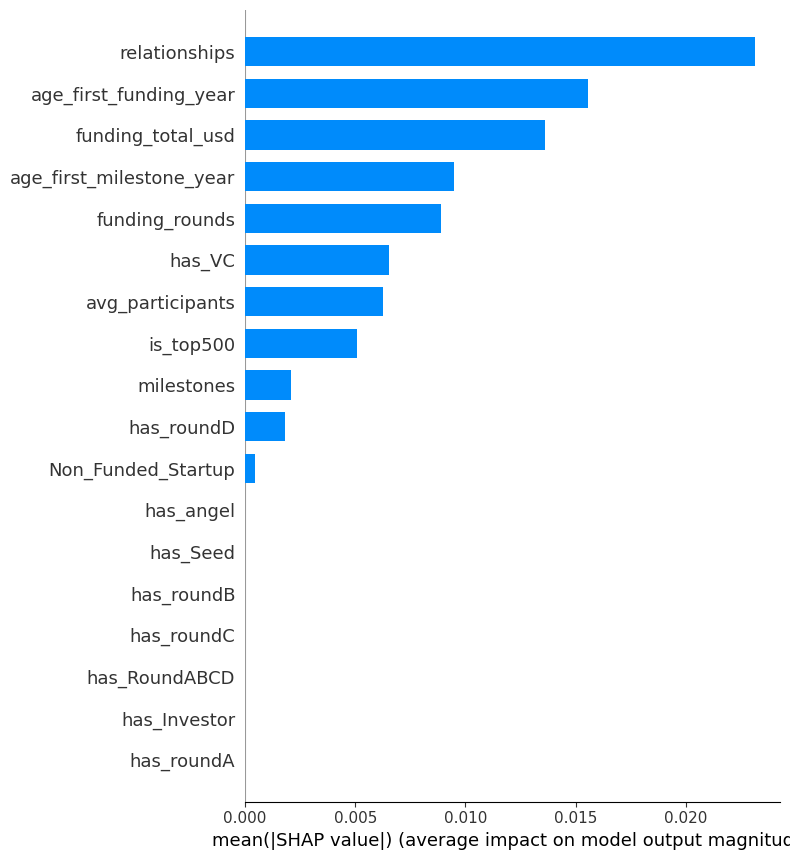

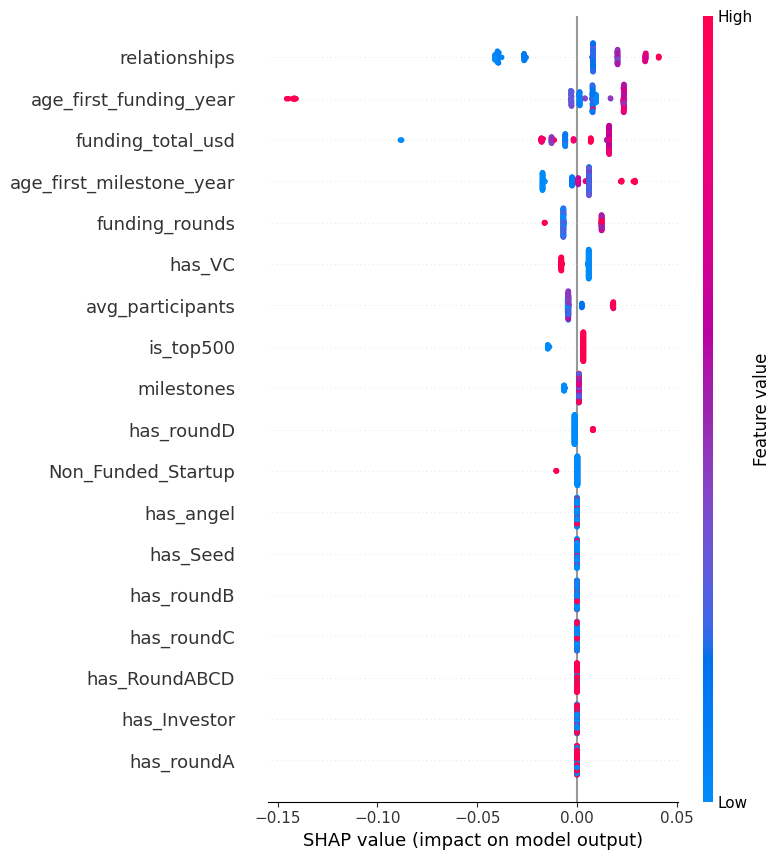

In [ ]:
import shap

# Create SHAP Explainer using predict_proba
explainer = shap.Explainer(best_ada.predict_proba, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Focus on class 1 (positive outcome)
shap.summary_plot(shap_values[..., 1], X_test, plot_type="bar")  # feature importance
shap.summary_plot(shap_values[..., 1], X_test)                  # detailed beeswarm


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Define LIME explainer using the resampled training data
lime_explainer = LimeTabularExplainer(
    X_resampled.values,
    feature_names=X_resampled.columns.tolist(),
    class_names=['closed', 'acquired'],
    discretize_continuous=True,
    verbose=True,
    mode='classification')

# Pick one test sample to explain (e.g., first row of X_test)
i = 0
exp = lime_explainer.explain_instance(
    X_test.iloc[i].values,
    best_ada.predict_proba,
    num_features=10)

# Show explanation
exp.show_in_notebook(show_table=True)
# OR save as HTML if needed
exp.save_to_file('lime_adaboost_explanation.html')


Intercept 0.49523141030911116
Prediction_local [0.51086148]
Right: 0.6086943436376806


The AdaBoost model predicts that this startup is more likely to be acquired (61%) than to close down.

Positive drivers toward "acquired" (orange):

- relationships > 9.00 → Strongly increases chance of being acquired. More - business/industry connections matter.

- avg_participants > 3.67 → More investors or participants increase acquisition likelihood.

- age_first_milestone_year → Earlier milestones (relative to company age) push toward acquisition.

- Large funding_total_usd ($25M here) also strengthens the acquisition signal.

Negative drivers toward "closed" (blue):

- age_first_funding_year = 5.83 → Suggests the startup took longer to get first funding; slower funding reduces acquisition chance.

- has_VC = 1 → Surprisingly, here it pushed toward "closed". This might mean VC-backed firms in this dataset don’t always get acquired, maybe due to high expectations or risks.

- milestones = 1 (only one milestone achieved) → Too few milestones increases closure risk.

Balance of Features

The acquisition-driving features (relationships, avg_participants, funding size) are stronger than the closure-driving features.

That explains why the prediction leans toward acquired (0.61).

Insights for the Startup Dataset

Relationships (network size) is the strongest factor in this sample.

Investment participation and funding amount strongly correlate with acquisition.

Timing of funding (age_first_funding_year) is critical — slower fundraising adds risk.

This startup is predicted to be acquired mainly because it has many relationships, multiple investors, and high funding — these outweigh the risks from slower funding and limited milestones.

Deploy Model

In [ ]:
#import pickle

In [ ]:
# Saving model to disk
#pickle.dump(ada_clf, open('model.pkl','wb'))

In [ ]:
# Loading model to compare the results
#model = pickle.load(open('model.pkl','rb'))
#print(model.predict([[2, 3, 4, 6, 3, 3, 375000, 3, 1, 6,]]))


In [ ]:
#df2 = df[["status","age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year","relationships","funding_rounds","funding_total_usd","milestones","avg_participants"]]
#df2.head(10)